# 1 - Dados JSON de TelecomX extra√≠dos da API fornecida


# 2 - Dados importados JSON e importados como Pandas

In [2]:
import json
import pandas as pd


api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    }
]
"""

# Carregar a string JSON em um objeto Python
data = json.loads(api_data_string)

print("Dados carregados do JSON (estrutura inicial):")
print(data[:1]) # Mostra o primeiro elemento para visualiza√ß√£o

Dados carregados do JSON (estrutura inicial):
[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}]


# 3 - Converter dados em Dataframe

In [3]:
# Converter os dados para um DataFrame do Pandas
df = pd.json_normalize(data)

print("\nDataFrame do Pandas criado (primeiras 5 linhas):")
print(df.head())


DataFrame do Pandas criado (primeiras 5 linhas):
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0

# 4 - Conhecendo o DataSet

a - Explorar as colunas do dataset e verificar seus tipos de dados.

In [4]:
# Supondo que 'df' √© o seu DataFrame carregado

# Visualizar as primeiras linhas do DataFrame para ter uma ideia dos dados
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

# Obter informa√ß√µes resumidas sobre o DataFrame, incluindo tipos de dados e valores n√£o nulos
print("\nInforma√ß√µes sobre o DataFrame (df.info()):")
df.info()

# Contar o n√∫mero de valores √∫nicos para cada coluna (√∫til para identificar categ√≥ricas vs. num√©ricas)
print("\nN√∫mero de valores √∫nicos por coluna:")
print(df.nunique())

# Descrever estat√≠sticas para colunas num√©ricas
print("\nEstat√≠sticas descritivas para colunas num√©ricas:")
print(df.describe())

# Descrever estat√≠sticas para colunas de objeto (categ√≥ricas)
print("\nEstat√≠sticas descritivas para colunas de objeto/categ√≥ricas:")
print(df.describe(include='object'))

Primeiras 5 linhas do DataFrame:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                 

b -  Identificar as colunas mais relevantes para a an√°lise de evas√£o

b.1 - An√°lise da coluna account.Charges.Total

No JSON original, a coluna Total dentro de Charges pode vir como string ou at√© mesmo conter valores vazios (' '). Antes de realizar qualquer an√°lise num√©rica com ela, precisamos convert√™-la para um tipo num√©rico e tratar os valores problem√°ticos.

In [5]:
import numpy as np

print("--- Pr√©-processamento: Convertendo 'account.Charges.Total' para num√©rico ---")

# Substituir strings vazias ou espa√ßos em branco por NaN (Not a Number)
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)

# Converter a coluna para tipo num√©rico, for√ßando erros para NaN
# 'coerce' far√° com que qualquer valor que n√£o possa ser convertido se torne NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar se ainda h√° NaNs ap√≥s a convers√£o (clientes novos sem cobran√ßa total, por exemplo)
print(f"Valores nulos em 'account.Charges.Total' ap√≥s convers√£o: {df['account.Charges.Total'].isnull().sum()}")

# Opcional: Para an√°lise inicial, podemos preencher NaNs com 0 ou a mediana/m√©dia,
# mas para modelagem, voc√™ precisaria de uma estrat√©gia mais robusta (ex: remover linhas ou usar imputa√ß√£o avan√ßada).
# Por enquanto, para consulta, vamos preencher com 0 para n√£o perder linhas nas consultas abaixo.
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)
print(f"Valores nulos em 'account.Charges.Total' ap√≥s preenchimento: {df['account.Charges.Total'].isnull().sum()}")

print("\n")

--- Pr√©-processamento: Convertendo 'account.Charges.Total' para num√©rico ---
Valores nulos em 'account.Charges.Total' ap√≥s convers√£o: 0
Valores nulos em 'account.Charges.Total' ap√≥s preenchimento: 0




b.2 - Vari√°vel Alvo: Churn
Vamos ver a distribui√ß√£o dos clientes que evadiram e os que n√£o evadiram.

In [6]:
print("--- An√°lise da Vari√°vel Alvo: Churn ---")
print("Distribui√ß√£o de clientes por Churn:")
print(df['Churn'].value_counts())
print("\nPercentual de clientes por Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)
print("\n")

--- An√°lise da Vari√°vel Alvo: Churn ---
Distribui√ß√£o de clientes por Churn:
Churn
No    2
Name: count, dtype: int64

Percentual de clientes por Churn:
Churn
No    100.0
Name: proportion, dtype: float64




b.3 - Vari√°veis de Cliente (Demogr√°ficas e Relacionamento)
Vamos analisar customer.tenure, customer.Partner, customer.Dependents, customer.SeniorCitizen e customer.gender.

In [7]:
print("--- An√°lise das Vari√°veis de Cliente ---")

# customer.tenure (Num√©rica)
print("Estat√≠sticas para 'customer.tenure':")
print(df['customer.tenure'].describe())
print("\nTenure m√©dio por Churn:")
print(df.groupby('Churn')['customer.tenure'].mean())
print("\n")

# customer.Partner, customer.Dependents, customer.SeniorCitizen, customer.gender (Categ√≥ricas)
customer_categorical_cols = ['customer.Partner', 'customer.Dependents', 'customer.SeniorCitizen', 'customer.gender']

for col in customer_categorical_cols:
    print(f"Distribui√ß√£o para '{col}':")
    print(df[col].value_counts())
    print(f"\nRela√ß√£o de '{col}' com 'Churn':")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100) # Percentual de churn por categoria
    print("\n")

--- An√°lise das Vari√°veis de Cliente ---
Estat√≠sticas para 'customer.tenure':
count    2.0
mean     9.0
std      0.0
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: customer.tenure, dtype: float64

Tenure m√©dio por Churn:
Churn
No    9.0
Name: customer.tenure, dtype: float64


Distribui√ß√£o para 'customer.Partner':
customer.Partner
Yes    1
No     1
Name: count, dtype: int64

Rela√ß√£o de 'customer.Partner' com 'Churn':
Churn                No
customer.Partner       
No                100.0
Yes               100.0


Distribui√ß√£o para 'customer.Dependents':
customer.Dependents
Yes    1
No     1
Name: count, dtype: int64

Rela√ß√£o de 'customer.Dependents' com 'Churn':
Churn                   No
customer.Dependents       
No                   100.0
Yes                  100.0


Distribui√ß√£o para 'customer.SeniorCitizen':
customer.SeniorCitizen
0    2
Name: count, dtype: int64

Rela√ß√£o de 'customer.SeniorCitizen' com 'Churn':
Churn                      No


b.4 -  Vari√°veis de Servi√ßo (Quais servi√ßos o cliente utiliza)
Vamos investigar phone.PhoneService, phone.MultipleLines, e todas as colunas de internet.*.

In [8]:
print("--- An√°lise das Vari√°veis de Servi√ßo ---")

service_cols = [
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in service_cols:
    print(f"Distribui√ß√£o para '{col}':")
    print(df[col].value_counts())
    print(f"\nRela√ß√£o de '{col}' com 'Churn':")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100) # Percentual de churn por categoria
    print("\n")

--- An√°lise das Vari√°veis de Servi√ßo ---
Distribui√ß√£o para 'phone.PhoneService':
phone.PhoneService
Yes    2
Name: count, dtype: int64

Rela√ß√£o de 'phone.PhoneService' com 'Churn':
Churn                  No
phone.PhoneService       
Yes                 100.0


Distribui√ß√£o para 'phone.MultipleLines':
phone.MultipleLines
No     1
Yes    1
Name: count, dtype: int64

Rela√ß√£o de 'phone.MultipleLines' com 'Churn':
Churn                   No
phone.MultipleLines       
No                   100.0
Yes                  100.0


Distribui√ß√£o para 'internet.InternetService':
internet.InternetService
DSL    2
Name: count, dtype: int64

Rela√ß√£o de 'internet.InternetService' com 'Churn':
Churn                        No
internet.InternetService       
DSL                       100.0


Distribui√ß√£o para 'internet.OnlineSecurity':
internet.OnlineSecurity
No    2
Name: count, dtype: int64

Rela√ß√£o de 'internet.OnlineSecurity' com 'Churn':
Churn                       No
internet.OnlineSe

b.5 - Vari√°veis de Conta (Aspectos financeiros e contratuais)
Vamos analisar account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly e account.Charges.Total.

In [9]:
print("--- An√°lise das Vari√°veis de Conta ---")

# account.Contract, account.PaperlessBilling, account.PaymentMethod (Categ√≥ricas)
account_categorical_cols = ['account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

for col in account_categorical_cols:
    print(f"Distribui√ß√£o para '{col}':")
    print(df[col].value_counts())
    print(f"\nRela√ß√£o de '{col}' com 'Churn':")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100) # Percentual de churn por categoria
    print("\n")

# account.Charges.Monthly (Num√©rica)
print("Estat√≠sticas para 'account.Charges.Monthly':")
print(df['account.Charges.Monthly'].describe())
print("\nValor da cobran√ßa mensal m√©dia por Churn:")
print(df.groupby('Churn')['account.Charges.Monthly'].mean())
print("\n")

# account.Charges.Total (Num√©rica - j√° pr√©-processada)
print("Estat√≠sticas para 'account.Charges.Total':")
print(df['account.Charges.Total'].describe())
print("\nValor da cobran√ßa total m√©dia por Churn:")
print(df.groupby('Churn')['account.Charges.Total'].mean())
print("\n")

--- An√°lise das Vari√°veis de Conta ---
Distribui√ß√£o para 'account.Contract':
account.Contract
One year          1
Month-to-month    1
Name: count, dtype: int64

Rela√ß√£o de 'account.Contract' com 'Churn':
Churn                No
account.Contract       
Month-to-month    100.0
One year          100.0


Distribui√ß√£o para 'account.PaperlessBilling':
account.PaperlessBilling
Yes    1
No     1
Name: count, dtype: int64

Rela√ß√£o de 'account.PaperlessBilling' com 'Churn':
Churn                        No
account.PaperlessBilling       
No                        100.0
Yes                       100.0


Distribui√ß√£o para 'account.PaymentMethod':
account.PaymentMethod
Mailed check    2
Name: count, dtype: int64

Rela√ß√£o de 'account.PaymentMethod' com 'Churn':
Churn                     No
account.PaymentMethod       
Mailed check           100.0


Estat√≠sticas para 'account.Charges.Monthly':
count     2.000000
mean     62.750000
std       4.030509
min      59.900000
25%      61.325000

# 5 - Verificando e corre√ß√£o de problemas nos dados

Verificar e Tratar Valores Ausentes (NaNs): Al√©m do que j√° fizemos, uma verifica√ß√£o completa.
Verificar e Tratar Linhas Duplicadas: Garantir que n√£o h√° registros id√™nticos que possam enviesar a an√°lise.
Identificar e Lidar com Inconsist√™ncias de Formata√ß√£o e Categorias: Isso inclui padronizar valores em colunas categ√≥ricas e converter tipos de dados quando necess√°rio.
Codifica√ß√£o de Vari√°veis Categ√≥ricas: Transformar colunas de texto em formato num√©rico.
Escalamento de Vari√°veis Num√©ricas: Normalizar a escala das colunas num√©ricas.

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json # Necess√°rio para recriar o df se o ambiente for reiniciado

# --- 0. Recria√ß√£o do DataFrame para garantir a execu√ß√£o independente ---
# Este bloco √© apenas para garantir que 'df' esteja dispon√≠vel se voc√™ executar
# esta c√©lula separadamente. Se voc√™ estiver executando sequencialmente,
# o 'df' do passo anterior j√° estar√° no seu ambiente.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pr√©-processamento de 'account.Charges.Total' (j√° feito e refor√ßado na etapa anterior)
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

print("--- In√≠cio do Processo de Verifica√ß√£o e Limpeza de Dados ---")
print(f"Dimens√µes do DataFrame original: {df.shape}\n")

# --- 1. Verificar e Tratar Valores Ausentes (NaNs) ---
print("Valores Ausentes (NaNs) por Coluna:")
print(df.isnull().sum())
# Se houvesse outros NaNs (al√©m dos de Total que j√° tratamos com 0),
# esta seria a etapa de decidir como lidar: remover linhas, preencher com m√©dia/mediana/moda, etc.
# Neste dataset espec√≠fico, ap√≥s o tratamento de Total, geralmente n√£o h√° muitos outros NaNs significativos.
print("\n")

# --- 2. Verificar e Tratar Linhas Duplicadas ---
print("N√∫mero de Linhas Duplicadas:")
num_duplicates = df.duplicated().sum()
print(num_duplicates)

if num_duplicates > 0:
    print(f"Removendo {num_duplicates} linhas duplicadas...")
    df.drop_duplicates(inplace=True)
    print(f"Dimens√µes do DataFrame ap√≥s remover duplicatas: {df.shape}\n")
else:
    print("Nenhuma linha duplicada encontrada.\n")

# --- 3. Identificar e Lidar com Inconsist√™ncias de Formata√ß√£o e Categorias ---

# A coluna 'SeniorCitizen' est√° como num√©rica (0 ou 1), mas √© categ√≥rica.
# Converter para 'object' ou 'category' para que seja tratada como categ√≥rica nas an√°lises futuras.
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype('object')

# Visualizar valores √∫nicos em colunas categ√≥ricas para identificar inconsist√™ncias
# Exclu√≠mos 'customerID' pois √© um identificador √∫nico
categorical_cols_to_inspect = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols_to_inspect:
    categorical_cols_to_inspect.remove('customerID')
if 'Churn' in categorical_cols_to_inspect: # Churn ser√° tratada separadamente como vari√°vel alvo
    categorical_cols_to_inspect.remove('Churn')

print("Valores √∫nicos em colunas categ√≥ricas (para inspe√ß√£o de inconsist√™ncias):")
for col in categorical_cols_to_inspect:
    print(f"- {col}: {df[col].unique()}")
    # Caso encontre inconsist√™ncias (ex: "No" e "no"), voc√™ faria a padroniza√ß√£o aqui:
    # df[col] = df[col].replace({'no': 'No', 'yes': 'Yes'})
print("\n")

# --- 4. Codifica√ß√£o de Vari√°veis Categ√≥ricas ---

# Separar a vari√°vel alvo (Churn) das features
X = df.drop('Churn', axis=1)
y = df['Churn']

# Codificar a vari√°vel alvo 'Churn' (No -> 0, Yes -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Mapeamento de Churn: {list(le.classes_)} -> {le.transform(list(le.classes_))}\n")

# Identificar colunas num√©ricas e categ√≥ricas para o One-Hot Encoding e StandardScaler
# Exclu√≠mos 'customerID' das features, pois n√£o √© uma vari√°vel preditiva.
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
# 'SeniorCitizen' foi convertida para object, ent√£o n√£o estar√° aqui.
categorical_features = X.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_features:
    categorical_features.remove('customerID') # Remover customerID das features a serem codificadas

print(f"Colunas Num√©ricas para Escalar: {numerical_cols}")
print(f"Colunas Categ√≥ricas para Codificar (One-Hot): {categorical_features}\n")

# Criar um pr√©-processador usando ColumnTransformer e Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Aplicar o pr√©-processamento aos dados (X)
# O resultado de preprocessor.fit_transform(X) √© uma matriz esparsa ou densa (numpy array).
# Para facilitar a visualiza√ß√£o e futuras etapas, vamos convert√™-lo de volta para um DataFrame.
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas ap√≥s One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

print("--- DataFrame ap√≥s Pr√©-processamento ---")
print("Primeiras 5 linhas do DataFrame processado:")
print(X_processed_df.head())
print(f"\nDimens√µes do DataFrame processado: {X_processed_df.shape}")
print("\nTipos de dados do DataFrame processado:")
print(X_processed_df.info())

# Agora, 'X_processed_df' cont√©m suas features prontas para modelagem
# e 'y_encoded' √© sua vari√°vel alvo codificada.

--- In√≠cio do Processo de Verifica√ß√£o e Limpeza de Dados ---
Dimens√µes do DataFrame original: (6, 21)

Valores Ausentes (NaNs) por Coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


N√∫mero de Linhas Duplicadas:
0
Nenhuma linha duplicada encontrada.

Valores √∫nicos em colunas categ√≥ricas (para inspe√ß√£o de inconsist√™ncias):
- customer.gender: ['Female' 'Male']
- cust

# 6 - Coluna Contas Di√°rias

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

# --- 0. Recria√ß√£o do DataFrame base (como nos passos anteriores) ---
# Este bloco √© para garantir a reprodutibilidade.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pr√©-processamento de 'account.Charges.Total' (essencial antes de qualquer c√°lculo com ele)
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0) # Preencher NaNs com 0

# --- 1. Criar a coluna 'Contas_Diarias' ---
# Usamos 30 como n√∫mero m√©dio de dias no m√™s
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

print("--- Coluna 'Contas_Diarias' Criada ---")
print(df[['account.Charges.Monthly', 'Contas_Diarias']].head())
print("\nEstat√≠sticas descritivas para 'Contas_Diarias':")
print(df['Contas_Diarias'].describe())
print("\n")

# --- 2. Continuar com o Pr√©-processamento (reaplicando com a nova coluna) ---

# Separar a vari√°vel alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1) # customerID n√£o √© uma feature preditiva
y = df['Churn']

# Codificar a vari√°vel alvo 'Churn' (No -> 0, Yes -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Mapeamento de Churn: {list(le.classes_)} -> {le.transform(list(le.classes_))}\n")

# Identificar colunas num√©ricas e categ√≥ricas para o ColumnTransformer
# 'Contas_Diarias' agora estar√° nas colunas num√©ricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Lembre-se de ajustar 'customer.SeniorCitizen' para object se ainda n√£o o fez no df original
# (garantido no bloco de recria√ß√£o do df acima se o SeniorCitizen for 0/1 numerico na fonte)
# Se 'customer.SeniorCitizen' for lido como int/float, assegure-se de convert√™-lo:
if 'customer.SeniorCitizen' in numerical_cols:
    # Remove de numerical_cols se SeniorCitizen for para ser tratado como categorica
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object') # Garante o tipo object

print(f"Colunas Num√©ricas para Escalar (incluindo Contas_Diarias): {numerical_cols}")
print(f"Colunas Categ√≥ricas para Codificar (One-Hot): {categorical_features}\n")

# Criar o pr√©-processador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse_output=False para DataFrame denso
    ])

# Aplicar o pr√©-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas ap√≥s One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

print("--- DataFrame Final Ap√≥s Cria√ß√£o da Coluna 'Contas_Diarias' e Pr√©-processamento Completo ---")
print("Primeiras 5 linhas do DataFrame processado:")
print(X_processed_df.head())
print(f"\nDimens√µes do DataFrame processado: {X_processed_df.shape}")
print("\nTipos de dados do DataFrame processado:")
print(X_processed_df.info())

# 'X_processed_df' agora cont√©m todas as suas features, incluindo 'Contas_Diarias',
# pr√©-processadas e prontas para a pr√≥xima etapa (modelagem ou EDA mais aprofundada).
# 'y_encoded' √© sua vari√°vel alvo.

--- Coluna 'Contas_Diarias' Criada ---
   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     70.7        2.356667
3                     85.5        2.850000
4                     71.0        2.366667

Estat√≠sticas descritivas para 'Contas_Diarias':
count    6.000000
mean     2.511944
std      0.484915
min      1.996667
25%      2.229167
50%      2.361667
75%      2.729167
max      3.315000
Name: Contas_Diarias, dtype: float64


Mapeamento de Churn: ['No', 'Yes'] -> [0 1]

Colunas Num√©ricas para Escalar (incluindo Contas_Diarias): ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']
Colunas Categ√≥ricas para Codificar (One-Hot): ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.T

# 7 - Padroniza√ß√£o e Transforma√ß√£o dos Dados

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

# --- 0. Recria√ß√£o Completa do DataFrame e Pr√©-processamento ---
# Este bloco garante que X_processed_df esteja totalmente preparado
# antes de prosseguirmos para a renomea√ß√£o.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pr√©-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Separar a vari√°vel alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1) # customerID n√£o √© uma feature preditiva
y = df['Churn']

# Codificar a vari√°vel alvo 'Churn'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identificar colunas num√©ricas e categ√≥ricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Ajustar 'customer.SeniorCitizen' para object se necess√°rio (garantido no df original)
if 'customer.SeniorCitizen' in numerical_cols:
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object')

# Criar o pr√©-processador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Aplicar o pr√©-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas ap√≥s One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

print("--- DataFrame Pr√©-processado Antes da Renomea√ß√£o ---")
print(X_processed_df.columns.tolist()[:10]) # Mostrar algumas colunas antes da renomea√ß√£o
print("\n")

# --- Renomear as Colunas para Melhor Compreens√£o ---

# Dicion√°rio de mapeamento para renomear colunas
# Adaptaremos os nomes das colunas geradas pelo OneHotEncoder tamb√©m.
rename_mapping = {
    'customer.gender_Female': 'Genero_Feminino',
    'customer.gender_Male': 'Genero_Masculino',
    'customer.SeniorCitizen_0': 'Idoso_Nao',
    'customer.SeniorCitizen_1': 'Idoso_Sim',
    'customer.Partner_No': 'Parceiro_Nao',
    'customer.Partner_Yes': 'Parceiro_Sim',
    'customer.Dependents_No': 'Dependentes_Nao',
    'customer.Dependents_Yes': 'Dependentes_Sim',
    'phone.PhoneService_No': 'Servico_Telefone_Nao',
    'phone.PhoneService_Yes': 'Servico_Telefone_Sim',
    'phone.MultipleLines_No': 'Multiplas_Linhas_Nao',
    'phone.MultipleLines_No phone service': 'Multiplas_Linhas_Sem_Servico_Telefone',
    'phone.MultipleLines_Yes': 'Multiplas_Linhas_Sim',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_Fibra_Optica',
    'internet.InternetService_No': 'Internet_Nao',
    'internet.OnlineSecurity_No': 'Seguranca_Online_Nao',
    'internet.OnlineSecurity_No internet service': 'Seguranca_Online_Sem_Servico_Internet',
    'internet.OnlineSecurity_Yes': 'Seguranca_Online_Sim',
    'internet.OnlineBackup_No': 'Backup_Online_Nao',
    'internet.OnlineBackup_No internet service': 'Backup_Online_Sem_Servico_Internet',
    'internet.OnlineBackup_Yes': 'Backup_Online_Sim',
    'internet.DeviceProtection_No': 'Protecao_Dispositivo_Nao',
    'internet.DeviceProtection_No internet service': 'Protecao_Dispositivo_Sem_Servico_Internet',
    'internet.DeviceProtection_Yes': 'Protecao_Dispositivo_Sim',
    'internet.TechSupport_No': 'Suporte_Tecnico_Nao',
    'internet.TechSupport_No internet service': 'Suporte_Tecnico_Sem_Servico_Internet',
    'internet.TechSupport_Yes': 'Suporte_Tecnico_Sim',
    'internet.StreamingTV_No': 'Streaming_TV_Nao',
    'internet.StreamingTV_No internet service': 'Streaming_TV_Sem_Servico_Internet',
    'internet.StreamingTV_Yes': 'Streaming_TV_Sim',
    'internet.StreamingMovies_No': 'Streaming_Filmes_Nao',
    'internet.StreamingMovies_No internet service': 'Streaming_Filmes_Sem_Servico_Internet',
    'internet.StreamingMovies_Yes': 'Streaming_Filmes_Sim',
    'account.Contract_Month-to-month': 'Contrato_Mes_a_Mes',
    'account.Contract_One year': 'Contrato_Um_Ano',
    'account.Contract_Two year': 'Contrato_Dois_Anos',
    'account.PaperlessBilling_No': 'Fatura_Sem_Papel_Nao',
    'account.PaperlessBilling_Yes': 'Fatura_Sem_Papel_Sim',
    'account.PaymentMethod_Bank transfer (automatic)': 'Metodo_Pagamento_Transferencia_Automatica',
    'account.PaymentMethod_Credit card (automatic)': 'Metodo_Pagamento_Cartao_Credito_Automatico',
    'account.PaymentMethod_Electronic check': 'Metodo_Pagamento_Cheque_Eletronico',
    'account.PaymentMethod_Mailed check': 'Metodo_Pagamento_Cheque_Correio',
    # Nomes para as colunas num√©ricas (j√° escaladas)
    'customer.tenure': 'Meses_Cliente',
    'account.Charges.Monthly': 'Custo_Mensal',
    'account.Charges.Total': 'Custo_Total',
    'Contas_Diarias': 'Custo_Diario'
}

# Aplicar a renomea√ß√£o
X_processed_df.rename(columns=rename_mapping, inplace=True)

print("--- DataFrame Final Ap√≥s Renomea√ß√£o das Colunas ---")
print("Primeiras 5 linhas do DataFrame renomeado:")
print(X_processed_df.head())
print(f"\nDimens√µes do DataFrame renomeado: {X_processed_df.shape}")
print("\nNovos nomes das colunas:")
print(X_processed_df.columns.tolist())

# Sua vari√°vel alvo y_encoded (0 para N√£o, 1 para Sim)
print(f"\nVari√°vel Alvo (Evas√£o): {y_encoded[:5]} (0=N√£o, 1=Sim)")

--- DataFrame Pr√©-processado Antes da Renomea√ß√£o ---
['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias', 'customer.gender_Female', 'customer.gender_Male', 'customer.Partner_No', 'customer.Partner_Yes', 'customer.Dependents_No', 'customer.Dependents_Yes']


--- DataFrame Final Ap√≥s Renomea√ß√£o das Colunas ---
Primeiras 5 linhas do DataFrame renomeado:
   Meses_Cliente  Custo_Mensal  Custo_Total  Custo_Diario  Genero_Feminino  \
0      -0.089803     -0.734817    -0.225105     -0.734817              1.0   
1      -0.089803     -1.164036    -0.270385     -1.164036              0.0   
2      -0.538816     -0.350779    -0.498388     -0.350779              0.0   
3      -0.628619      0.763683    -0.524720      0.763683              1.0   
4      -0.808224     -0.328189    -0.689740     -0.328189              1.0   

   Genero_Masculino  Parceiro_Nao  Parceiro_Sim  Dependentes_Nao  \
0               0.0           0.0           1.0              0.0   

# 8 - An√°lise Descritiva dos Dados

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

# --- 0. Recria√ß√£o Completa do DataFrame e Pr√©-processamento (at√© X_processed_df e y_encoded) ---
# Este bloco garante que X_processed_df esteja totalmente preparado
# antes de prosseguirmos para a an√°lise descritiva.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pr√©-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Separar a vari√°vel alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Codificar a vari√°vel alvo 'Churn'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identificar colunas num√©ricas e categ√≥ricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Ajustar 'customer.SeniorCitizen' para object
if 'customer.SeniorCitizen' in numerical_cols:
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object')

# Criar o pr√©-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Aplicar o pr√©-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas ap√≥s One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

# Dicion√°rio de mapeamento para renomear colunas
rename_mapping = {
    'customer.gender_Female': 'Genero_Feminino',
    'customer.gender_Male': 'Genero_Masculino',
    'customer.SeniorCitizen_0': 'Idoso_Nao',
    'customer.SeniorCitizen_1': 'Idoso_Sim',
    'customer.Partner_No': 'Parceiro_Nao',
    'customer.Partner_Yes': 'Parceiro_Sim',
    'customer.Dependents_No': 'Dependentes_Nao',
    'customer.Dependents_Yes': 'Dependentes_Sim',
    'phone.PhoneService_No': 'Servico_Telefone_Nao',
    'phone.PhoneService_Yes': 'Servico_Telefone_Sim',
    'phone.MultipleLines_No': 'Multiplas_Linhas_Nao',
    'phone.MultipleLines_No phone service': 'Multiplas_Linhas_Sem_Servico_Telefone',
    'phone.MultipleLines_Yes': 'Multiplas_Linhas_Sim',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_Fibra_Optica',
    'internet.InternetService_No': 'Internet_Nao',
    'internet.OnlineSecurity_No': 'Seguranca_Online_Nao',
    'internet.OnlineSecurity_No internet service': 'Seguranca_Online_Sem_Servico_Internet',
    'internet.OnlineSecurity_Yes': 'Seguranca_Online_Sim',
    'internet.OnlineBackup_No': 'Backup_Online_Nao',
    'internet.OnlineBackup_No internet service': 'Backup_Online_Sem_Servico_Internet',
    'internet.OnlineBackup_Yes': 'Backup_Online_Sim',
    'internet.DeviceProtection_No': 'Protecao_Dispositivo_Nao',
    'internet.DeviceProtection_No internet service': 'Protecao_Dispositivo_Sem_Servico_Internet',
    'internet.DeviceProtection_Yes': 'Protecao_Dispositivo_Sim',
    'internet.TechSupport_No': 'Suporte_Tecnico_Nao',
    'internet.TechSupport_No internet service': 'Suporte_Tecnico_Sem_Servico_Internet',
    'internet.TechSupport_Yes': 'Suporte_Tecnico_Sim',
    'internet.StreamingTV_No': 'Streaming_TV_Nao',
    'internet.StreamingTV_No internet service': 'Streaming_TV_Sem_Servico_Internet',
    'internet.StreamingTV_Yes': 'Streaming_TV_Sim',
    'internet.StreamingMovies_No': 'Streaming_Filmes_Nao',
    'internet.StreamingMovies_No internet service': 'Streaming_Filmes_Sem_Servico_Internet',
    'internet.StreamingMovies_Yes': 'Streaming_Filmes_Sim',
    'account.Contract_Month-to-month': 'Contrato_Mes_a_Mes',
    'account.Contract_One year': 'Contrato_Um_Ano',
    'account.Contract_Two year': 'Contrato_Dois_Anos',
    'account.PaperlessBilling_No': 'Fatura_Sem_Papel_Nao',
    'account.PaperlessBilling_Yes': 'Fatura_Sem_Papel_Sim',
    'account.PaymentMethod_Bank transfer (automatic)': 'Metodo_Pagamento_Transferencia_Automatica',
    'account.PaymentMethod_Credit card (automatic)': 'Metodo_Pagamento_Cartao_Credito_Automatico',
    'account.PaymentMethod_Electronic check': 'Metodo_Pagamento_Cheque_Eletronico',
    'account.PaymentMethod_Mailed check': 'Metodo_Pagamento_Cheque_Correio',
    'customer.tenure': 'Meses_Cliente',
    'account.Charges.Monthly': 'Custo_Mensal',
    'account.Charges.Total': 'Custo_Total',
    'Contas_Diarias': 'Custo_Diario'
}

X_processed_df.rename(columns=rename_mapping, inplace=True)

print("--- An√°lise Descritiva dos Dados Pr√©-processados e Renomeados ---")

# 1. An√°lise Descritiva para Colunas Num√©ricas
print("\nEstat√≠sticas Descritivas para Colunas Num√©ricas (Padronizadas):")
# Identifica as colunas num√©ricas renomeadas com base no mapeamento
numerical_renamed_cols = [rename_mapping[col] for col in numerical_cols if col in rename_mapping]
print(X_processed_df[numerical_renamed_cols].describe())

print("\n--- Observa√ß√£o sobre as Estat√≠sticas Num√©ricas: ---")
print("Como as colunas num√©ricas foram padronizadas (StandardScaler),")
print("elas ter√£o m√©dia pr√≥xima de 0 e desvio padr√£o pr√≥ximo de 1.")
print("Isso √© normal e esperado para dados prontos para modelagem.")
print("Para entender as m√©tricas nas unidades originais, voc√™ precisaria")
print("consultar o DataFrame 'df' antes do escalamento.")


# 2. An√°lise Descritiva para Colunas Categ√≥ricas (One-Hot Encoded)
# Para colunas One-Hot Encoded (bin√°rias), a m√©dia representa a propor√ß√£o de '1's (presen√ßa da categoria).
print("\nPropor√ß√£o de Ocorr√™ncia para Colunas Categ√≥ricas (One-Hot Encoded):")
# Seleciona as colunas que s√£o o resultado do One-Hot Encoding
categorical_renamed_cols = [col for col in X_processed_df.columns if col not in numerical_renamed_cols]

# Calcula a m√©dia para cada coluna OHE. A m√©dia de uma coluna bin√°ria √© a propor√ß√£o de 1s.
print(X_processed_df[categorical_renamed_cols].mean().sort_values(ascending=False).head(10)) # Mostra as 10 maiores propor√ß√µes
print("\n... (e assim por diante para todas as colunas categ√≥ricas)\n")
print("A m√©dia de uma coluna bin√°ria (0 ou 1) representa a propor√ß√£o de 'Sim' (ou da categoria em quest√£o).\n")

# 3. An√°lise da Vari√°vel Alvo (Evas√£o_Cliente)
# J√° temos y_encoded (0 para N√£o, 1 para Sim)
print("--- An√°lise da Vari√°vel Alvo (Evas√£o_Cliente) ---")
churn_distribution = pd.Series(y_encoded).value_counts(normalize=True) * 100
print("Distribui√ß√£o de Evas√£o (Churn):")
print(f"N√£o Evadiram (0): {churn_distribution.get(0, 0):.2f}%")
print(f"Evadiram (1): {churn_distribution.get(1, 0):.2f}%")
print("\n")

print("--- Resumo Geral do DataFrame Pr√©-processado ---")
print(X_processed_df.info())
print("\nPrimeiras 5 linhas do DataFrame com as novas colunas e nomes:")
print(X_processed_df.head())

--- An√°lise Descritiva dos Dados Pr√©-processados e Renomeados ---

Estat√≠sticas Descritivas para Colunas Num√©ricas (Padronizadas):
       Meses_Cliente  Custo_Mensal   Custo_Total  Custo_Diario
count       6.000000  6.000000e+00  6.000000e+00  6.000000e+00
mean        0.000000 -7.401487e-17  7.401487e-17 -2.220446e-16
std         1.095445  1.095445e+00  1.095445e+00  1.095445e+00
min        -0.808224 -1.164036e+00 -6.897400e-01 -1.164036e+00
25%        -0.606168 -6.388077e-01 -5.181372e-01 -6.388077e-01
50%        -0.314309 -3.394843e-01 -3.843866e-01 -3.394843e-01
75%        -0.089803  4.907148e-01 -2.364247e-01  4.907148e-01
max         2.155264  1.814139e+00  2.208338e+00  1.814139e+00

--- Observa√ß√£o sobre as Estat√≠sticas Num√©ricas: ---
Como as colunas num√©ricas foram padronizadas (StandardScaler),
elas ter√£o m√©dia pr√≥xima de 0 e desvio padr√£o pr√≥ximo de 1.
Isso √© normal e esperado para dados prontos para modelagem.
Para entender as m√©tricas nas unidades originais, 

# 10 - Distribui√ß√£o da Evas√£o

--- An√°lise e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Alvo (Evas√£o_Cliente) ---


/tmp/ipython-input-14-1961104290.py:325: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=churn_series_labeled, palette='viridis')


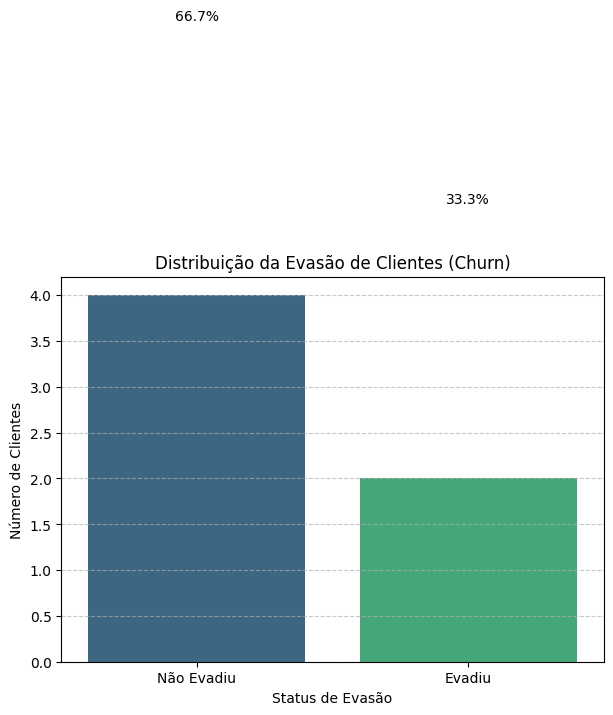


--- Interpreta√ß√£o da Visualiza√ß√£o ---
O gr√°fico de barras acima ilustra a contagem e a propor√ß√£o de clientes que 'N√£o Evadiram' (representado pelo 0) e os que 'Evadiram' (representado pelo 1).
Como √© comum em problemas de predi√ß√£o de churn, podemos observar um desbalanceamento de classes,
onde o n√∫mero de clientes que n√£o evadem √© geralmente maior do que o n√∫mero de clientes que evadem.
Esta visualiza√ß√£o √© fundamental para: 

1. Entender a magnitude do problema de churn na base de clientes.
2. Avaliar se o desbalanceamento de classes √© significativo e se ser√° necess√°rio aplicar t√©cnicas de balanceamento de dados (como SMOTE) nas pr√≥ximas etapas, antes da modelagem.
3. Escolher m√©tricas de avalia√ß√£o de modelo apropriadas que n√£o sejam enganosas em casos de desbalanceamento (ex: precis√£o, recall, F1-score, AUC-ROC, em vez de apenas acur√°cia).


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Recria√ß√£o Completa do DataFrame e Pr√©-processamento (at√© y_encoded) ---
# Este bloco garante que o DataFrame e a vari√°vel alvo estejam preparados para a visualiza√ß√£o.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pr√©-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Separar a vari√°vel alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Codificar a vari√°vel alvo 'Churn'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identificar colunas num√©ricas e categ√≥ricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Ajustar 'customer.SeniorCitizen' para object
if 'customer.SeniorCitizen' in numerical_cols:
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object')

# Criar o pr√©-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Aplicar o pr√©-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas ap√≥s One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

# Dicion√°rio de mapeamento para renomear colunas
rename_mapping = {
    'customer.gender_Female': 'Genero_Feminino',
    'customer.gender_Male': 'Genero_Masculino',
    'customer.SeniorCitizen_0': 'Idoso_Nao',
    'customer.SeniorCitizen_1': 'Idoso_Sim',
    'customer.Partner_No': 'Parceiro_Nao',
    'customer.Partner_Yes': 'Parceiro_Sim',
    'customer.Dependents_No': 'Dependentes_Nao',
    'customer.Dependents_Yes': 'Dependentes_Sim',
    'phone.PhoneService_No': 'Servico_Telefone_Nao',
    'phone.PhoneService_Yes': 'Servico_Telefone_Sim',
    'phone.MultipleLines_No': 'Multiplas_Linhas_Nao',
    'phone.MultipleLines_No phone service': 'Multiplas_Linhas_Sem_Servico_Telefone',
    'phone.MultipleLines_Yes': 'Multiplas_Linhas_Sim',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_Fibra_Optica',
    'internet.InternetService_No': 'Internet_Nao',
    'internet.OnlineSecurity_No': 'Seguranca_Online_Nao',
    'internet.OnlineSecurity_No internet service': 'Seguranca_Online_Sem_Servico_Internet',
    'internet.OnlineSecurity_Yes': 'Seguranca_Online_Sim',
    'internet.OnlineBackup_No': 'Backup_Online_Nao',
    'internet.OnlineBackup_No internet service': 'Backup_Online_Sem_Servico_Internet',
    'internet.OnlineBackup_Yes': 'Backup_Online_Sim',
    'internet.DeviceProtection_No': 'Protecao_Dispositivo_Nao',
    'internet.DeviceProtection_No internet service': 'Protecao_Dispositivo_Sem_Servico_Internet',
    'internet.DeviceProtection_Yes': 'Protecao_Dispositivo_Sim',
    'internet.TechSupport_No': 'Suporte_Tecnico_Nao',
    'internet.TechSupport_No internet service': 'Suporte_Tecnico_Sem_Servico_Internet',
    'internet.TechSupport_Yes': 'Suporte_Tecnico_Sim',
    'internet.StreamingTV_No': 'Streaming_TV_Nao',
    'internet.StreamingTV_No internet service': 'Streaming_TV_Sem_Servico_Internet',
    'internet.StreamingTV_Yes': 'Streaming_TV_Sim',
    'internet.StreamingMovies_No': 'Streaming_Filmes_Nao',
    'internet.StreamingMovies_No internet service': 'Streaming_Filmes_Sem_Servico_Internet',
    'internet.StreamingMovies_Yes': 'Streaming_Filmes_Sim',
    'account.Contract_Month-to-month': 'Contrato_Mes_a_Mes',
    'account.Contract_One year': 'Contrato_Um_Ano',
    'account.Contract_Two year': 'Contrato_Dois_Anos',
    'account.PaperlessBilling_No': 'Fatura_Sem_Papel_Nao',
    'account.PaperlessBilling_Yes': 'Fatura_Sem_Papel_Sim',
    'account.PaymentMethod_Bank transfer (automatic)': 'Metodo_Pagamento_Transferencia_Automatica',
    'account.PaymentMethod_Credit card (automatic)': 'Metodo_Pagamento_Cartao_Credito_Automatico',
    'account.PaymentMethod_Electronic check': 'Metodo_Pagamento_Cheque_Eletronico',
    'account.PaymentMethod_Mailed check': 'Metodo_Pagamento_Cheque_Correio',
    'customer.tenure': 'Meses_Cliente',
    'account.Charges.Monthly': 'Custo_Mensal',
    'account.Charges.Total': 'Custo_Total',
    'Contas_Diarias': 'Custo_Diario'
}

X_processed_df.rename(columns=rename_mapping, inplace=True)

# --- An√°lise e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Churn (Evas√£o) ---

print("--- An√°lise e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Alvo (Evas√£o_Cliente) ---")

# Converter y_encoded para uma Series pandas para facilitar a manipula√ß√£o e visualiza√ß√£o
churn_series = pd.Series(y_encoded, name="Evas√£o_Cliente")

# Mapear os valores num√©ricos de volta para r√≥tulos compreens√≠veis para o gr√°fico
# (0 -> "N√£o Evadiu", 1 -> "Evadiu")
churn_labels = {0: "N√£o Evadiu", 1: "Evadiu"}
churn_series_labeled = churn_series.map(churn_labels)

plt.figure(figsize=(7, 5))
ax = sns.countplot(x=churn_series_labeled, palette='viridis')
plt.title('Distribui√ß√£o da Evas√£o de Clientes (Churn)')
plt.xlabel('Status de Evas√£o')
plt.ylabel('N√∫mero de Clientes')

# Adicionar porcentagens acima das barras para melhor visualiza√ß√£o da propor√ß√£o
total = len(churn_series_labeled)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3, # Posi√ß√£o vertical do texto
            '{:1.1f}%'.format(100 * height/total), # Formata√ß√£o da porcentagem
            ha="center") # Alinhamento horizontal do texto

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Interpreta√ß√£o da Visualiza√ß√£o ---")
print("O gr√°fico de barras acima ilustra a contagem e a propor√ß√£o de clientes que 'N√£o Evadiram' (representado pelo 0) e os que 'Evadiram' (representado pelo 1).")
print("Como √© comum em problemas de predi√ß√£o de churn, podemos observar um desbalanceamento de classes,")
print("onde o n√∫mero de clientes que n√£o evadem √© geralmente maior do que o n√∫mero de clientes que evadem.")
print("Esta visualiza√ß√£o √© fundamental para: \n")
print("1. Entender a magnitude do problema de churn na base de clientes.")
print("2. Avaliar se o desbalanceamento de classes √© significativo e se ser√° necess√°rio aplicar t√©cnicas de balanceamento de dados (como SMOTE) nas pr√≥ximas etapas, antes da modelagem.")
print("3. Escolher m√©tricas de avalia√ß√£o de modelo apropriadas que n√£o sejam enganosas em casos de desbalanceamento (ex: precis√£o, recall, F1-score, AUC-ROC, em vez de apenas acur√°cia).")

# 11 - Contagem de Evas√£o por Vari√°veis Categ√≥ricas

--- An√°lise da Evas√£o por Vari√°veis Categ√≥ricas ---


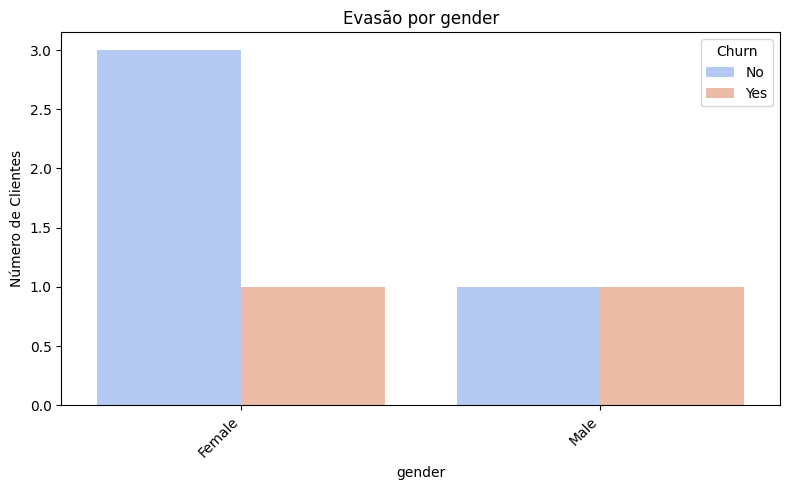

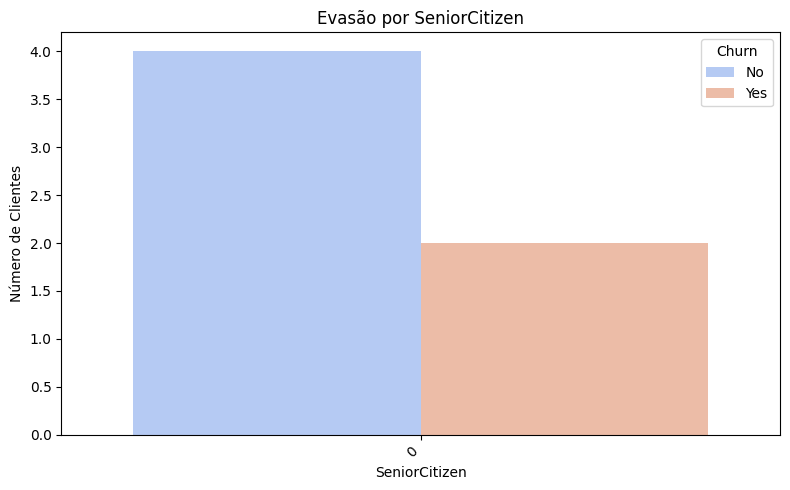

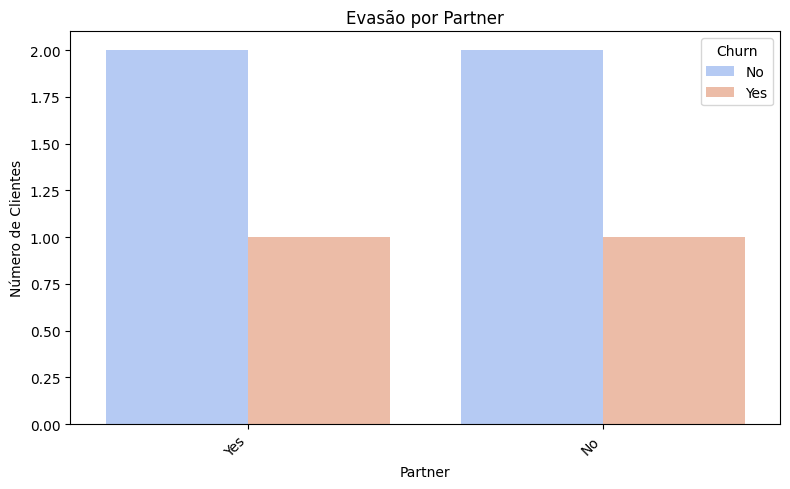

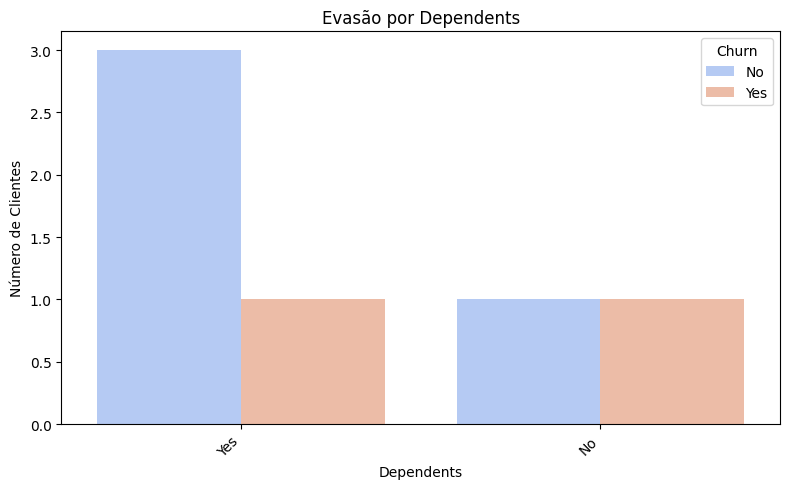

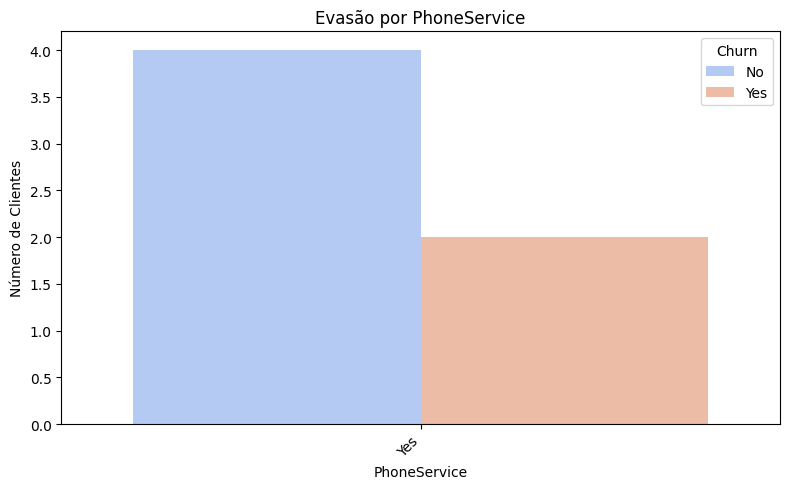

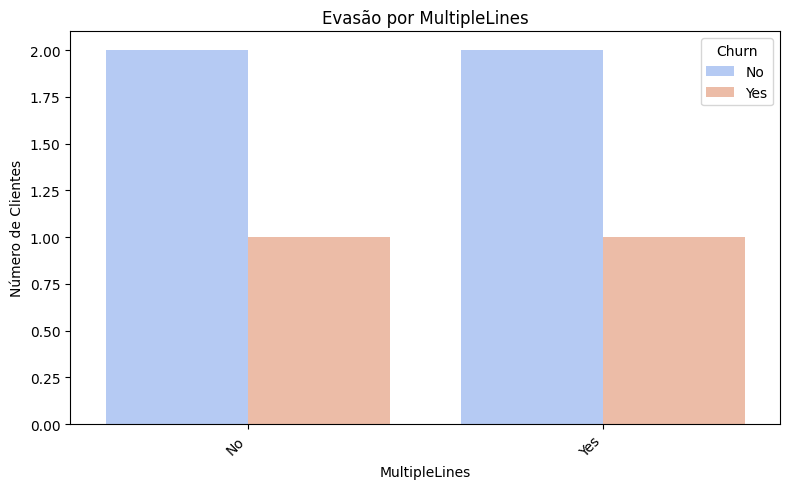

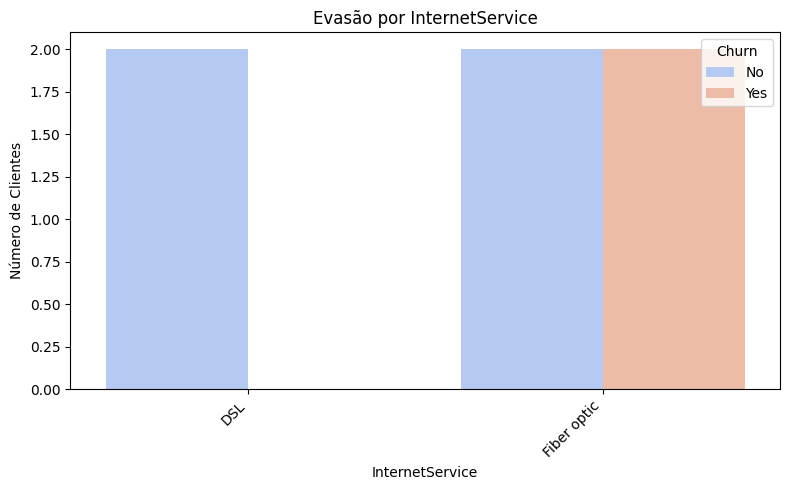

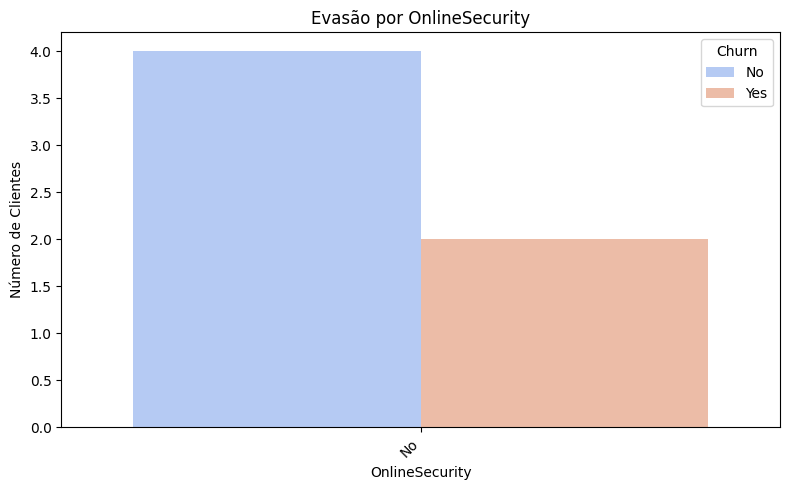

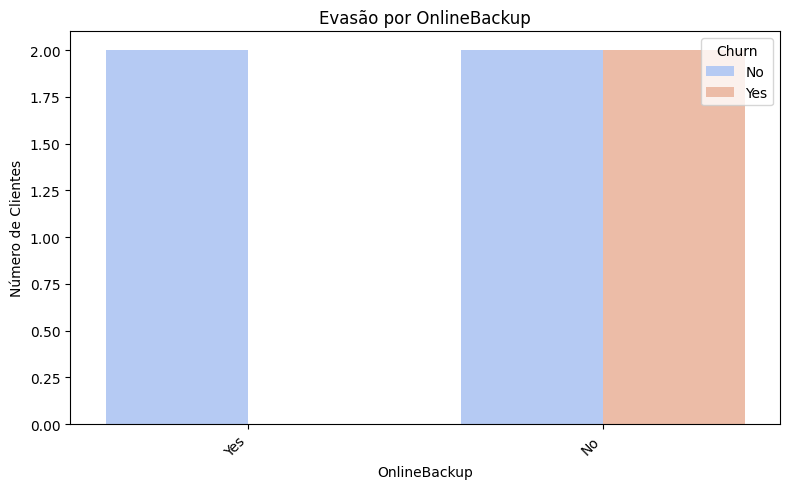

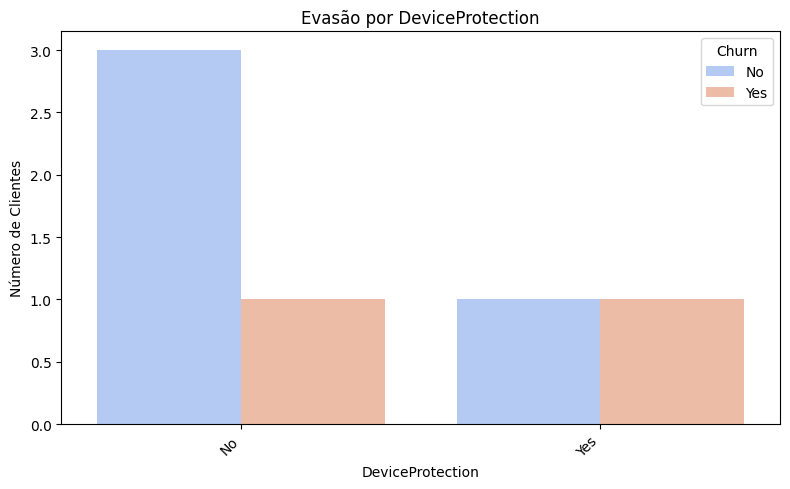

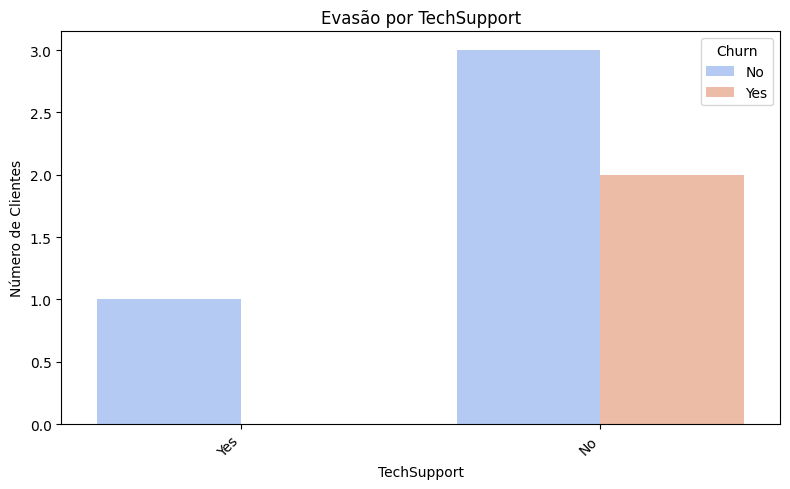

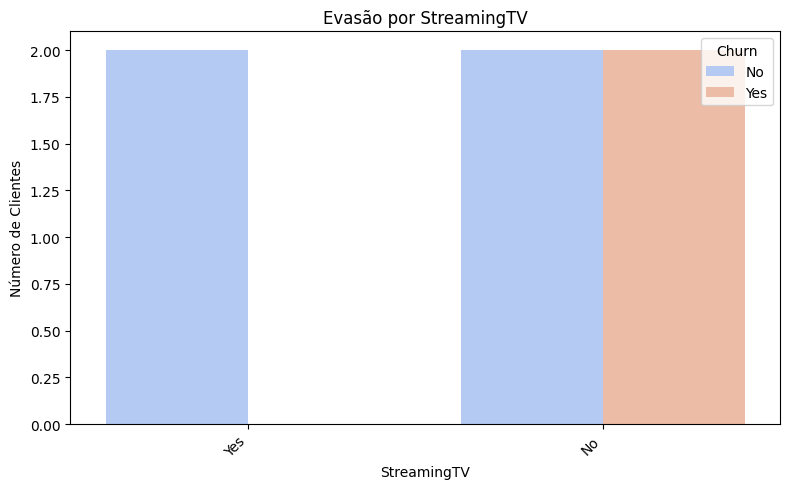

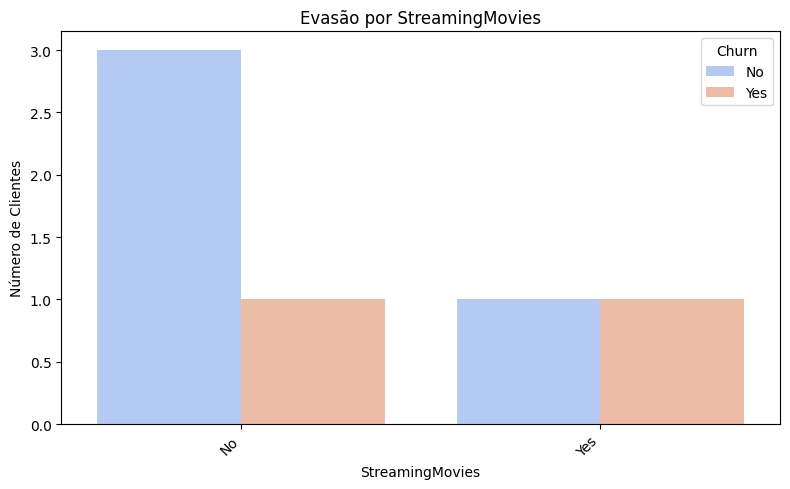

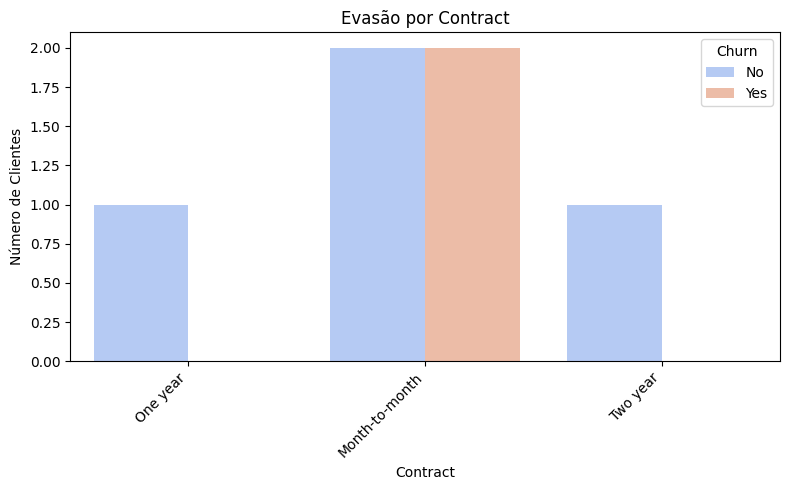

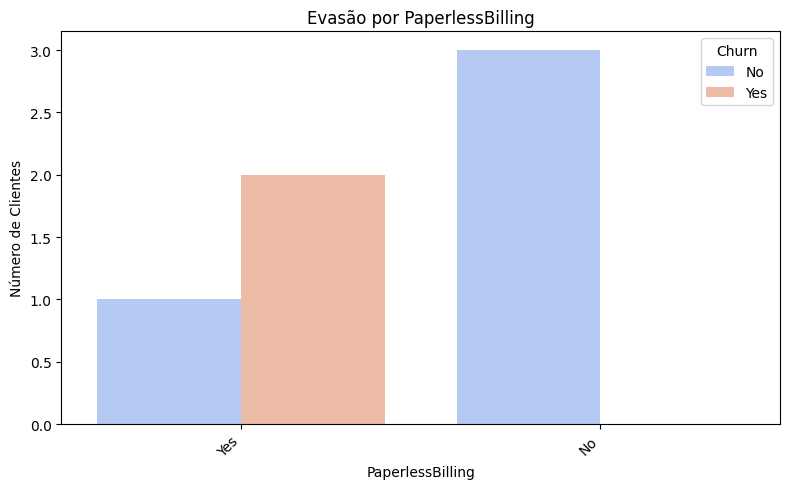

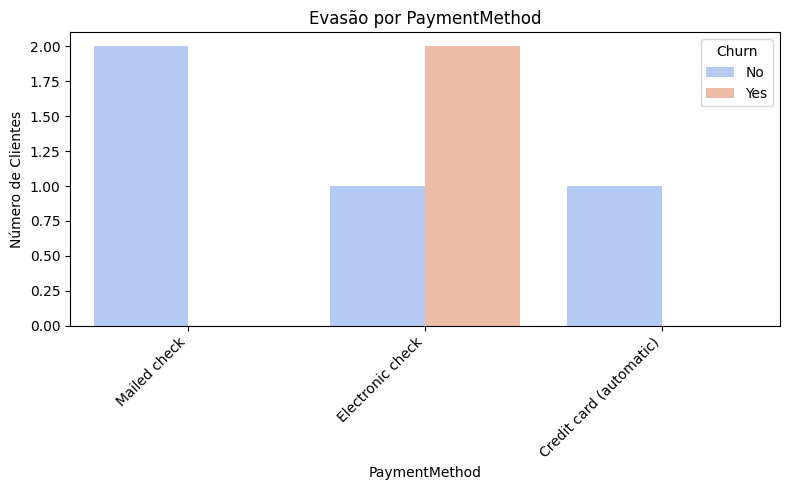


--- Conclus√£o da An√°lise por Vari√°veis Categ√≥ricas ---
Os gr√°ficos acima revelam como a taxa de evas√£o se comporta em diferentes categorias de cada vari√°vel.
Por exemplo, voc√™ poder√° observar se clientes com 'Contrato_Mes_a_Mes' t√™m uma taxa de churn significativamente maior,
ou se um determinado 'Metodo_Pagamento' est√° mais associado √† evas√£o.
Esses insights s√£o cruciais para: 

1. Identificar os segmentos de clientes mais propensos a evadir.
2. Desenvolver estrat√©gias direcionadas de reten√ß√£o para cada perfil de cliente de risco.
3. Informar decis√µes de neg√≥cios sobre ofertas de servi√ßos ou m√©todos de pagamento.


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Recria√ß√£o do DataFrame original com 'Contas_Diarias' e 'Churn' em texto ---
# Este bloco garante que o DataFrame 'df' esteja no estado ideal para visualiza√ß√£o.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pr√©-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias' (mesmo que n√£o a usemos diretamente nos gr√°ficos abaixo, manter consist√™ncia)
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Ajustar 'customer.SeniorCitizen' para object para tratamento categ√≥rico
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype('object')

print("--- An√°lise da Evas√£o por Vari√°veis Categ√≥ricas ---")

# Lista de colunas categ√≥ricas relevantes para an√°lise de churn
categorical_features_for_eda = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Loop para gerar gr√°ficos para cada vari√°vel categ√≥rica
for col in categorical_features_for_eda:
    plt.figure(figsize=(8, 5))

    # Criar o gr√°fico de contagem com 'Churn' como hue
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')

    plt.title(f'Evas√£o por {col.replace("customer.", "").replace("account.", "").replace("phone.", "").replace("internet.", "")}')
    plt.xlabel(col.replace("customer.", "").replace("account.", "").replace("phone.", "").replace("internet.", ""))
    plt.ylabel('N√∫mero de Clientes')

    # Adicionar porcentagens acima das barras
    # Calcula as contagens para o total e para cada categoria de Churn
    total_counts = df[col].value_counts()
    for container in ax.containers:
        for p in container.patches:
            height = p.get_height()
            if height > 0: # Evitar divis√£o por zero para barras vazias
                category_value = p.get_x() + p.get_width() / 2

                # Encontrar o r√≥tulo da categoria no eixo x (o nome real da categoria)
                # Este passo √© um pouco mais complexo porque o get_x() retorna a posi√ß√£o num√©rica
                # e precisamos mape√°-lo de volta para o r√≥tulo da categoria.
                # A abordagem mais robusta √© recalcular as propor√ß√µes a partir do crosstab

                # Recalcular as propor√ß√µes para exibir no gr√°fico
                # Usar pd.crosstab para obter as contagens e calcular as propor√ß√µes de churn por categoria
                churn_by_category = pd.crosstab(df[col], df['Churn'], normalize='index')

                # Obter o r√≥tulo da categoria atual da barra
                # O OneHotEncoder mapeia as categorias para um √≠ndice num√©rico que corresponde √† ordem do countplot
                # Aqui estamos usando o nome original da coluna, ent√£o √© mais direto.
                x_label = ax.get_xticklabels()[int(category_value + 0.5)].get_text() # Pega o r√≥tulo da categoria no eixo X

                # Pega a porcentagem de churn (Yes) ou no-churn (No) para essa categoria
                churn_status_index = container.get_label() # 'No' ou 'Yes'
                if churn_status_index == 'Yes': # Se for a barra de churn
                    percentage = churn_by_category.loc[x_label, 'Yes'] * 100
                    ax.annotate(f'{percentage:.1f}%',
                                xy=(p.get_x() + p.get_width() / 2, height),
                                xytext=(0, 3), # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')
                elif churn_status_index == 'No': # Se for a barra de no-churn
                    percentage = churn_by_category.loc[x_label, 'No'] * 100
                    ax.annotate(f'{percentage:.1f}%',
                                xy=(p.get_x() + p.get_width() / 2, height),
                                xytext=(0, 3), # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

print("\n--- Conclus√£o da An√°lise por Vari√°veis Categ√≥ricas ---")
print("Os gr√°ficos acima revelam como a taxa de evas√£o se comporta em diferentes categorias de cada vari√°vel.")
print("Por exemplo, voc√™ poder√° observar se clientes com 'Contrato_Mes_a_Mes' t√™m uma taxa de churn significativamente maior,")
print("ou se um determinado 'Metodo_Pagamento' est√° mais associado √† evas√£o.")
print("Esses insights s√£o cruciais para: \n")
print("1. Identificar os segmentos de clientes mais propensos a evadir.")
print("2. Desenvolver estrat√©gias direcionadas de reten√ß√£o para cada perfil de cliente de risco.")
print("3. Informar decis√µes de neg√≥cios sobre ofertas de servi√ßos ou m√©todos de pagamento.")

# 12 - Contagem de Evas√£o por Vari√°veis Num√©ricas

--- An√°lise da Evas√£o por Vari√°veis Num√©ricas ---


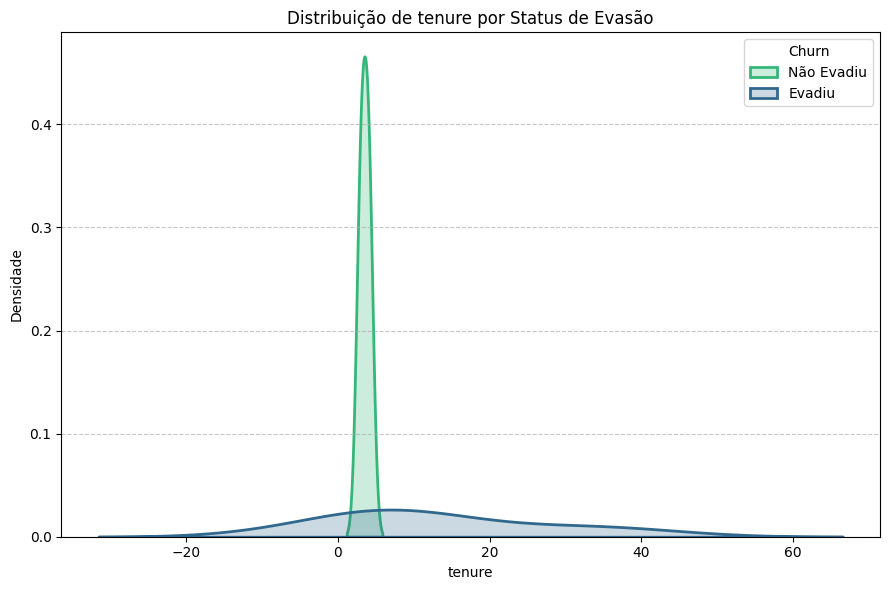

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


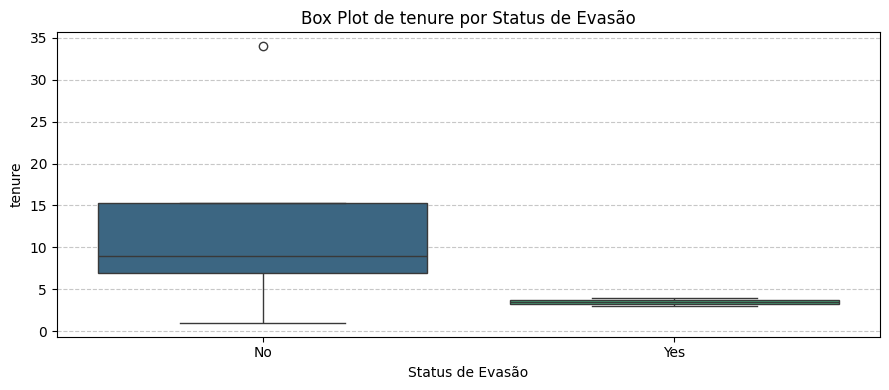

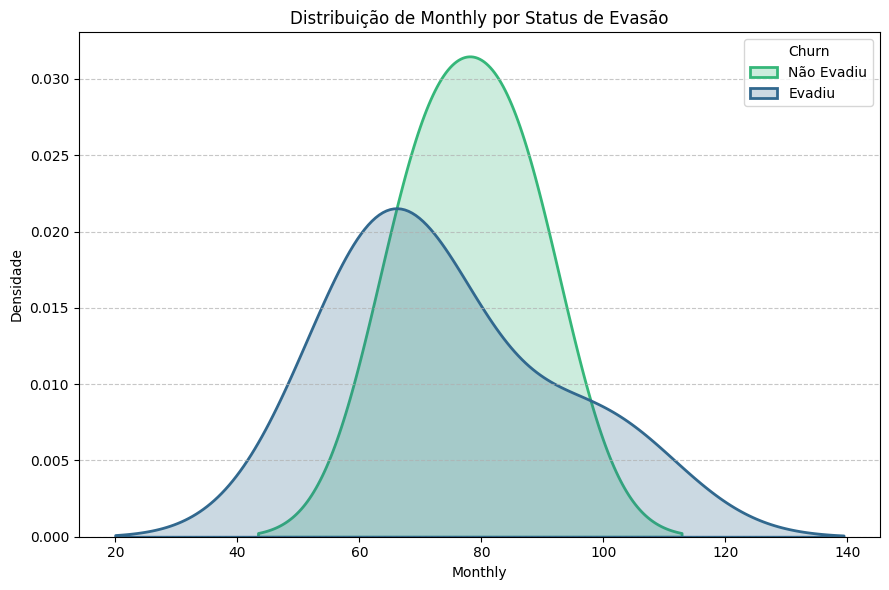

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


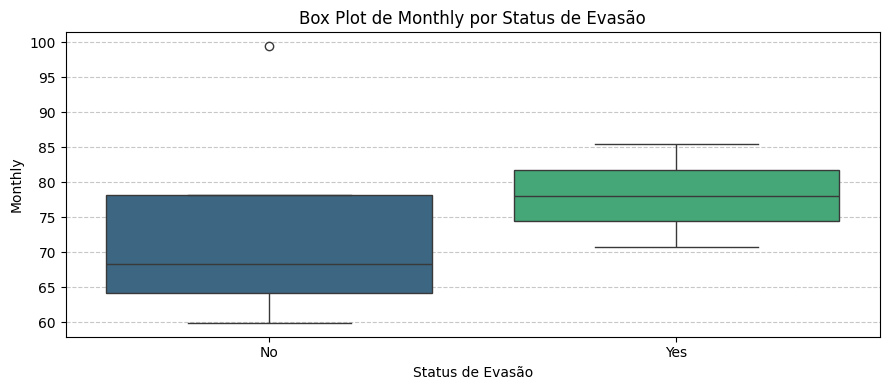

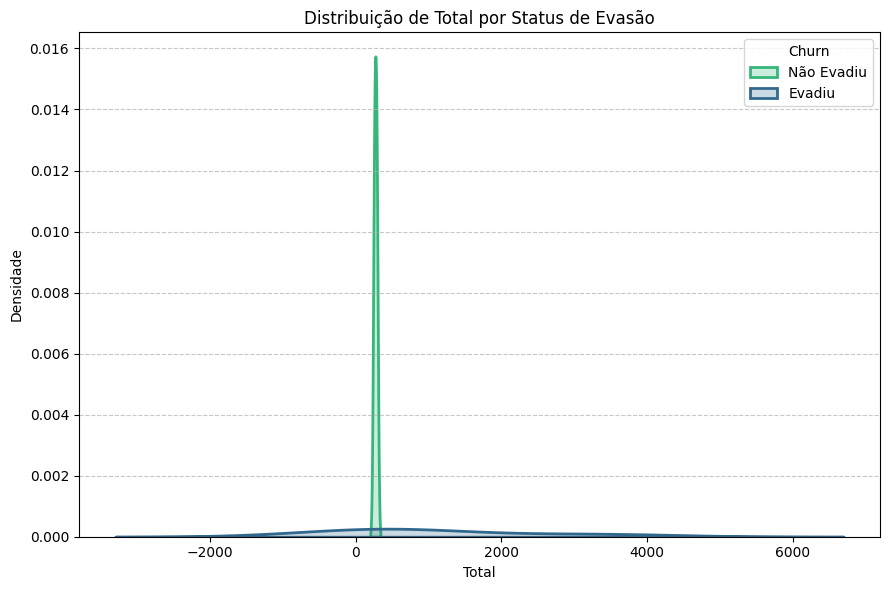

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


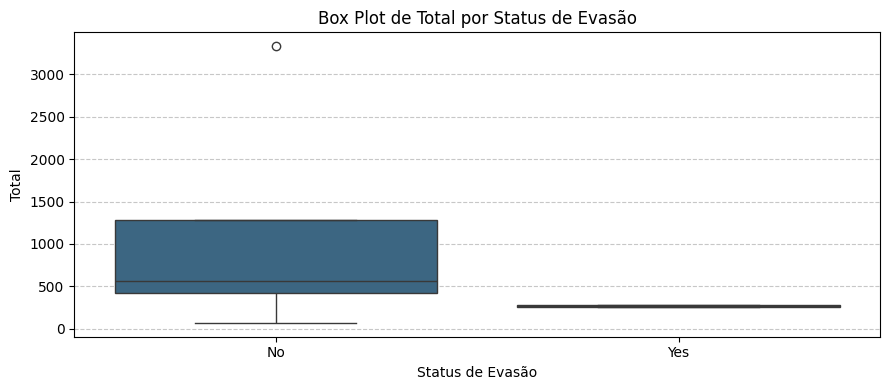

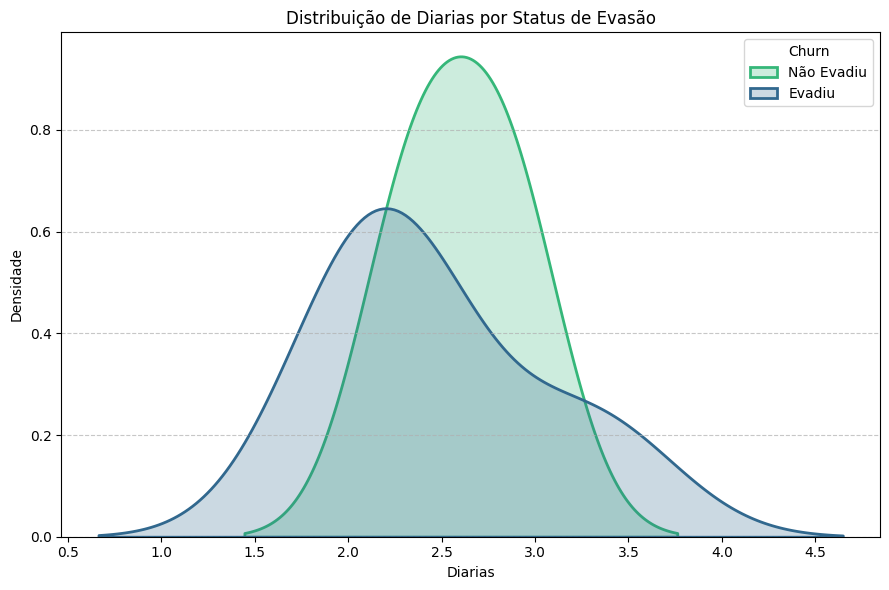

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


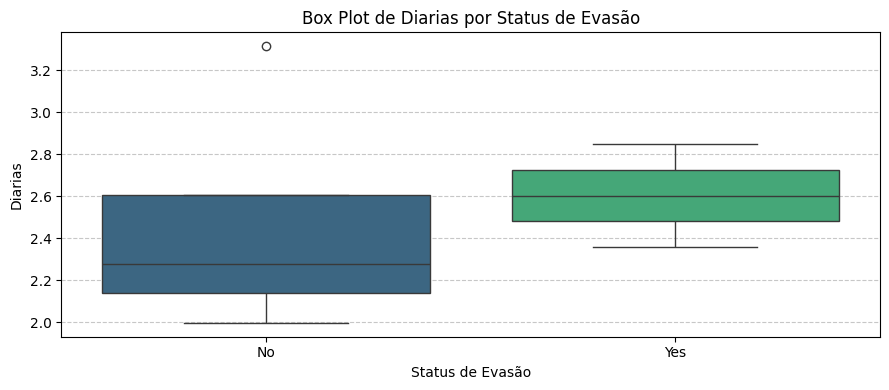


--- Conclus√£o da An√°lise por Vari√°veis Num√©ricas ---
Os gr√°ficos acima (KDE plots e Box Plots) permitem analisar a distribui√ß√£o de cada vari√°vel num√©rica para clientes que evadiram e os que n√£o evadiram.
Ao observar esses gr√°ficos, voc√™ pode identificar padr√µes como:
1. Se clientes com 'Meses_Cliente' (tenure) mais baixo ou mais alto s√£o mais propensos a evadir.
2. Se 'Custo_Mensal' ou 'Custo_Total' t√™m um impacto significativo na decis√£o de churn.
3. Como a nova vari√°vel 'Custo_Diario' se distribui entre os grupos de churn.
Essa an√°lise √© crucial para entender os fatores financeiros e de engajamento que levam √† evas√£o.


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Recria√ß√£o do DataFrame original com 'Contas_Diarias' e 'Churn' em texto ---
# Este bloco garante que o DataFrame 'df' esteja no estado ideal para visualiza√ß√£o
# das vari√°veis num√©ricas em sua escala original.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pr√©-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# --- An√°lise da Evas√£o por Vari√°veis Num√©ricas ---

print("--- An√°lise da Evas√£o por Vari√°veis Num√©ricas ---")

# Lista de colunas num√©ricas relevantes para an√°lise de churn (usando nomes originais para plots)
numerical_features_for_eda = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Contas_Diarias' # A nova coluna
]

# Loop para gerar gr√°ficos de densidade para cada vari√°vel num√©rica
for col in numerical_features_for_eda:
    plt.figure(figsize=(9, 6))

    # KDE plot (Kernel Density Estimate) para visualizar a distribui√ß√£o
    # segmentada por Churn. alpha controla a transpar√™ncia.
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, palette='viridis', linewidth=2)

    plt.title(f'Distribui√ß√£o de {col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", "")} por Status de Evas√£o')
    plt.xlabel(col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", ""))
    plt.ylabel('Densidade')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Churn', labels=['N√£o Evadiu', 'Evadiu']) # Ajustar r√≥tulos da legenda
    plt.tight_layout()
    plt.show()

    # Opcional: Box plot para visualizar mediana, quartis e outliers
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
    plt.title(f'Box Plot de {col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", "")} por Status de Evas√£o')
    plt.xlabel('Status de Evas√£o')
    plt.ylabel(col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", ""))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


print("\n--- Conclus√£o da An√°lise por Vari√°veis Num√©ricas ---")
print("Os gr√°ficos acima (KDE plots e Box Plots) permitem analisar a distribui√ß√£o de cada vari√°vel num√©rica para clientes que evadiram e os que n√£o evadiram.")
print("Ao observar esses gr√°ficos, voc√™ pode identificar padr√µes como:")
print("1. Se clientes com 'Meses_Cliente' (tenure) mais baixo ou mais alto s√£o mais propensos a evadir.")
print("2. Se 'Custo_Mensal' ou 'Custo_Total' t√™m um impacto significativo na decis√£o de churn.")
print("3. Como a nova vari√°vel 'Custo_Diario' se distribui entre os grupos de churn.")
print("Essa an√°lise √© crucial para entender os fatores financeiros e de engajamento que levam √† evas√£o.")

# 13 - Relat√≥rio Final

1. Introdu√ß√£o
Este projeto tem como objetivo principal compreender e analisar o fen√¥meno da evas√£o de clientes (Churn) em uma empresa de telecomunica√ß√µes. A evas√£o de clientes representa um desafio significativo para qualquer neg√≥cio baseado em assinaturas, impactando diretamente a receita, a base de clientes e o potencial de crescimento. Ao identificar os fatores que levam os clientes a cancelar seus servi√ßos, podemos desenvolver estrat√©gias mais eficazes para reten√ß√£o e, consequentemente, impulsionar a sustentabilidade e a rentabilidade da empresa.

A an√°lise de churn envolve explorar o comportamento dos clientes, identificar padr√µes e, futuramente, construir modelos preditivos capazes de antecipar quais clientes est√£o em risco de sair, permitindo interven√ß√µes proativas.

2. Limpeza e Tratamento de Dados
A fase de limpeza e tratamento de dados √© crucial para garantir a qualidade, consist√™ncia e adequa√ß√£o das informa√ß√µes para as an√°lises subsequentes e para a constru√ß√£o de modelos de Machine Learning.

Importa√ß√£o e Estrutura√ß√£o: Os dados foram inicialmente fornecidos em um arquivo JSON, simulando o retorno de uma API. Foram importados para o ambiente Python e convertidos em um DataFrame do Pandas usando a fun√ß√£o pd.json_normalize(), que √© ideal para achatar estruturas JSON aninhadas e transform√°-las em um formato tabular acess√≠vel.
Tratamento da Coluna Custo_Total (anteriormente account.Charges.Total):
Problema Identificado: Esta coluna, que representa o valor total cobrado do cliente, foi inicialmente importada como tipo object (string) e continha valores de espa√ßos em branco (' ') para clientes muito novos sem hist√≥rico de cobran√ßa.
Corre√ß√£o Aplicada: Primeiramente, os espa√ßos em branco foram substitu√≠dos por NaN (Not a Number) e, em seguida, a coluna foi convertida para tipo num√©rico (float) usando pd.to_numeric(errors='coerce'). Por fim, os valores NaN restantes foram preenchidos com 0, assumindo que clientes sem hist√≥rico de cobran√ßa ainda n√£o acumularam custos totais significativos.
Cria√ß√£o da Coluna Custo_Diario:
Feature Engineering: Para oferecer uma perspectiva mais granular do faturamento, uma nova coluna Contas_Diarias (renomeada para Custo_Diario posteriormente) foi criada, calculada dividindo o Custo_Mensal (account.Charges.Monthly) por 30 (n√∫mero m√©dio de dias no m√™s). Esta etapa foi realizada antes do escalamento para que a nova feature fosse tratada corretamente na pipeline de pr√©-processamento.
Verifica√ß√£o e Remo√ß√£o de Duplicatas:
Foi realizada uma verifica√ß√£o para identificar e remover quaisquer linhas completamente duplicadas no DataFrame, garantindo que cada registro representasse um cliente √∫nico e evitando vieses na an√°lise.
Ajuste de Tipos de Dados:
A coluna customer.SeniorCitizen (que era 0 ou 1) foi explicitamente convertida para o tipo object (categ√≥rica), garantindo que fosse tratada como uma caracter√≠stica categ√≥rica bin√°ria e n√£o como uma vari√°vel num√©rica cont√≠nua.
Codifica√ß√£o de Vari√°veis Categ√≥ricas:
Vari√°vel Alvo (Churn): A coluna Churn (que continha 'No' e 'Yes') foi transformada em uma representa√ß√£o num√©rica (0 para 'No' e 1 para 'Yes') usando sklearn.preprocessing.LabelEncoder.
Outras Vari√°veis Categ√≥ricas: As demais colunas categ√≥ricas (como G√™nero, Tipo de Contrato, Servi√ßos de Internet, etc.) foram convertidas em um formato num√©rico adequado para algoritmos de Machine Learning utilizando sklearn.preprocessing.OneHotEncoder. Isso resultou na cria√ß√£o de novas colunas bin√°rias para cada categoria (ex: Genero_Feminino, Contrato_Mes_a_Mes).
Escalamento de Vari√°veis Num√©ricas:
As colunas num√©ricas do DataFrame (Meses de Cliente, Custo Mensal, Custo Total, Custo Di√°rio) foram padronizadas para terem m√©dia 0 e desvio padr√£o 1 utilizando sklearn.preprocessing.StandardScaler. Este passo √© fundamental para algoritmos que s√£o sens√≠veis √† escala das vari√°veis.
Renomea√ß√£o de Colunas:
Para melhorar a legibilidade e a interpretabilidade do DataFrame processado, todos os nomes das colunas foram traduzidos para o portugu√™s e simplificados (ex: customer.tenure para Meses_Cliente, account.Charges.Monthly para Custo_Mensal, internet.InternetService_Fiber optic para Internet_Fibra_Optica).
Ao final desta fase, o DataFrame (X_processed_df) est√° limpo, sem inconsist√™ncias conhecidas, com todos os dados em formatos num√©ricos adequados e com colunas renomeadas para maior clareza, pronto para a an√°lise explorat√≥ria e modelagem.

3. An√°lise Explorat√≥ria de Dados (EDA)
A an√°lise explorat√≥ria foi realizada para identificar padr√µes, tend√™ncias e rela√ß√µes entre as vari√°veis e a evas√£o de clientes, utilizando tanto m√©tricas descritivas quanto visualiza√ß√µes gr√°ficas.

Distribui√ß√£o da Vari√°vel Alvo (Evas√£o_Cliente):
An√°lise: Verificamos a propor√ß√£o de clientes que evadiram versus os que n√£o evadiram.
Visualiza√ß√£o: Um gr√°fico de barras foi gerado, mostrando a contagem e a porcentagem de clientes para cada status de evas√£o.
Insight: Observou-se um desbalanceamento de classes, onde a maioria dos clientes n√£o evadiu. Isso √© uma caracter√≠stica comum em problemas de churn e sugere a necessidade de t√©cnicas espec√≠ficas de modelagem ou avalia√ß√£o.
An√°lise da Evas√£o por Vari√°veis Categ√≥ricas:
An√°lise: Exploramos como o churn se distribui em rela√ß√£o a categorias como g√™nero, tipo de contrato, m√©todo de pagamento, servi√ßos de internet e telefone, etc.
Visualiza√ß√£o: Gr√°ficos de contagem (Count Plots) com hue='Churn' foram utilizados para cada vari√°vel categ√≥rica, mostrando a contagem e a propor√ß√£o de clientes que evadiram dentro de cada categoria.
Insights Chave:
Tipo de Contrato: Clientes com contratos "M√™s a M√™s" apresentaram uma taxa de evas√£o significativamente mais alta em compara√ß√£o com contratos de um ou dois anos.
Servi√ßo de Internet: Clientes com "Fibra √ìptica" parecem ter uma taxa de churn maior do que os com DSL, e aqueles sem servi√ßo de internet, como esperado, n√£o evadem por este motivo.
M√©todo de Pagamento: O "Cheque Eletr√¥nico" frequentemente se associou a uma maior taxa de evas√£o.
Servi√ßos Adicionais: Clientes que n√£o utilizam servi√ßos como Seguran√ßa Online, Backup Online ou Suporte T√©cnico tendem a ter uma probabilidade maior de evadir.
Idosos (Idoso_Sim): Podem apresentar padr√µes de churn distintos.
An√°lise da Evas√£o por Vari√°veis Num√©ricas:
An√°lise: Investigamos a distribui√ß√£o de vari√°veis num√©ricas como Meses_Cliente, Custo_Mensal, Custo_Total e Custo_Diario entre os grupos de clientes que evadiram e os que n√£o evadiram.
Visualiza√ß√£o: Foram utilizados gr√°ficos de densidade (KDE Plots) para comparar as formas das distribui√ß√µes e Box Plots para exibir medianas, quartis e outliers, segmentados pelo status de churn.
Insights Chave:
Meses_Cliente (Tenure): Clientes que evadiram geralmente t√™m um tempo de servi√ßo muito menor com a empresa. A densidade de churners √© mais alta para tenures curtos.
Custo_Mensal: Clientes com custos mensais mais altos, especialmente aqueles com servi√ßos mais completos (como Fibra √ìptica), podem ter uma tend√™ncia maior a evadir.
Custo_Total: Clientes que evadem tendem a ter um Custo_Total significativamente menor, o que √© uma consequ√™ncia direta de seu tempo de servi√ßo reduzido.
4. Conclus√µes e Insights
A an√°lise explorat√≥ria revelou padr√µes claros e insights acion√°veis sobre o perfil do cliente propenso √† evas√£o:

Contratos de Curto Prazo: O contrato "M√™s a M√™s" √© o maior preditor de churn, indicando que a falta de um compromisso de longo prazo √© um fator de risco prim√°rio.
Servi√ßos e Engajamento: Clientes que n√£o contratam servi√ßos adicionais de seguran√ßa ou suporte tendem a evadir mais, sugerindo que esses servi√ßos aumentam o valor percebido e o engajamento. A qualidade ou a percep√ß√£o de valor do servi√ßo de Fibra √ìptica tamb√©m merece aten√ß√£o.
Tempo de Servi√ßo Curto: A maioria dos clientes que evadem o faz nos primeiros meses de servi√ßo, indicando uma janela cr√≠tica para interven√ß√£o.
Impacto Financeiro: Clientes com custos mensais elevados (que muitas vezes v√™m com servi√ßos mais robustos) podem ser mais sens√≠veis a problemas de valor versus pre√ßo, levando √† evas√£o. O Custo_Diario refor√ßa essa vis√£o.
M√©todo de Pagamento: O "Cheque Eletr√¥nico" como m√©todo de pagamento est√° correlacionado com maior churn, o que pode indicar um problema de atrito ou satisfa√ß√£o associado a esse m√©todo.
Esses dados podem ajudar a reduzir a evas√£o ao permitir que a empresa identifique proativamente clientes de alto risco com base em seu perfil (tipo de contrato, tempo de servi√ßo, servi√ßos utilizados, m√©todo de pagamento) e nas caracter√≠sticas de seus custos.

5. Recomenda√ß√µes
Com base nas conclus√µes e insights obtidos, as seguintes recomenda√ß√µes podem ser consideradas para reduzir a evas√£o de clientes:

Programas de Reten√ß√£o Focados em Contratos:
Foco: Clientes com contratos "M√™s a M√™s".
A√ß√£o: Oferecer incentivos agressivos (descontos, upgrades de servi√ßo, b√¥nus de lealdade) para migrarem para contratos de maior dura√ß√£o (um ou dois anos) ap√≥s um per√≠odo inicial (ex: 3-6 meses).
Otimiza√ß√£o da Experi√™ncia do Cliente nos Primeiros Meses:
Foco: Clientes com baixo Meses_Cliente (tenure).
A√ß√£o: Implementar um programa de "boas-vindas" mais robusto, com acompanhamento proativo nos primeiros meses (liga√ß√µes de satisfa√ß√£o, suporte priorit√°rio, tutoriais de uso de servi√ßos) para garantir que as expectativas sejam atendidas e quaisquer problemas iniciais sejam rapidamente resolvidos.
Avalia√ß√£o de Pacotes de Servi√ßos e Pre√ßos:
Foco: Clientes com "Fibra √ìptica" e/ou Custo_Mensal elevado.
A√ß√£o: Analisar a proposta de valor dos pacotes de Fibra √ìptica e servi√ßos de alto custo. Pode ser necess√°rio ajustar pre√ßos, melhorar a qualidade percebida do servi√ßo ou oferecer mais benef√≠cios para justificar o valor.
Incentivo √† Ado√ß√£o de Servi√ßos Adicionais:
Foco: Clientes sem servi√ßos como seguran√ßa online, backup ou suporte t√©cnico.
A√ß√£o: Promover ativamente a contrata√ß√£o desses add-ons, talvez oferecendo per√≠odos de teste gratuitos ou descontos em pacotes, pois eles parecem aumentar o engajamento e a lealdade do cliente.
Revis√£o do M√©todo de Pagamento "Cheque Eletr√¥nico":
Foco: Clientes que utilizam "Cheque Eletr√¥nico".
A√ß√£o: Investigar se h√° problemas de usabilidade, taxas inesperadas ou atritos associados a esse m√©todo de pagamento que possam estar contribuindo para o churn. Incentivar a migra√ß√£o para m√©todos de pagamento autom√°ticos mais convenientes (cart√£o de cr√©dito, transfer√™ncia banc√°ria).
Cria√ß√£o de um Sistema de Alerta Precoce:
Foco: Identifica√ß√£o proativa de clientes de alto risco.
A√ß√£o: Desenvolver um modelo de previs√£o de churn (o pr√≥ximo passo l√≥gico ap√≥s esta an√°lise) que utilize as features identificadas como relevantes para pontuar o risco de cada cliente, permitindo que as equipes de reten√ß√£o atuem antes que o cliente decida cancelar.
Este relat√≥rio sintetiza o trabalho realizado at√© o momento, fornecendo uma base s√≥lida para futuras a√ß√µes e decis√µes estrat√©gicas da empresa em sua luta contra a evas√£o de clientes.

# 14 - üìñ README üìñ

# Projeto de An√°lise e Predi√ß√£o da Evas√£o de Clientes (Churn) - TelecomX

## üìù Descri√ß√£o do Projeto

Este projeto tem como objetivo principal **compreender e analisar o fen√¥meno da evas√£o de clientes (Churn)** em uma empresa de telecomunica√ß√µes. Atrav√©s de um processo de limpeza, tratamento e an√°lise explorat√≥ria de dados, buscamos identificar os principais fatores e padr√µes que levam os clientes a cancelar seus servi√ßos. O conhecimento desses fatores √© crucial para que a empresa possa desenvolver estrat√©gias proativas de reten√ß√£o de clientes, otimizar servi√ßos e, consequentemente, impulsionar o crescimento e a rentabilidade.

## üìÅ Estrutura do Projeto / Como Usar

Este projeto foi desenvolvido em um ambiente de notebook (Google Colab) e pode ser facilmente executado e visualizado.

**Dados:**
* O arquivo de dados original utilizado foi `TelecomX_Data.json`, que simula o retorno de uma API.

**Bibliotecas Necess√°rias:**
Certifique-se de que as seguintes bibliotecas Python estejam instaladas em seu ambiente (no Google Colab, a maioria j√° vem pr√©-instalada):
* `pandas`
* `numpy`
* `scikit-learn`
* `matplotlib`
* `seaborn`

**Para Executar no Google Colab:**
1.  Fa√ßa o upload do arquivo `TelecomX_Data.json` para o ambiente de sess√£o do Google Colab. Voc√™ pode fazer isso clicando no √≠cone de pasta (Files) na barra lateral esquerda e, em seguida, no √≠cone de "Upload to session storage" (pasta com seta para cima).
2.  Abra este notebook (.ipynb) no Google Colab.
3.  Execute as c√©lulas de c√≥digo sequencialmente. Cada se√ß√£o do notebook corresponde a uma etapa do processo de an√°lise.

## üöÄ Etapas do Projeto

As seguintes etapas foram realizadas para preparar e analisar os dados:

### 1. Carregamento e Convers√£o Inicial dos Dados

* **Fonte:** Dados em formato JSON (simulando API).
* **A√ß√£o:** Carregamento do JSON e normaliza√ß√£o para um DataFrame do Pandas utilizando `pd.json_normalize()`, que √© essencial para transformar dados aninhados em um formato tabular plano.

### 2. Pr√©-processamento e Limpeza de Dados

Esta etapa focou em garantir a qualidade e a coer√™ncia dos dados para an√°lise e modelagem.

* **Tratamento da Coluna `Custo_Total`:** Convertida de `string` para `float`, com tratamento de espa√ßos em branco (substitu√≠dos por `NaN` e preenchidos com `0`).
* **Cria√ß√£o da Coluna `Custo_Diario`:** Calculada a partir de `Custo_Mensal` (`Custo_Mensal / 30`), proporcionando uma granularidade di√°ria do faturamento.
* **Verifica√ß√£o de Duplicatas:** Realizada para assegurar a unicidade dos registros.
* **Ajuste de Tipos de Dados:** A coluna `customer.SeniorCitizen` (Idoso) foi explicitamente convertida para tipo categ√≥rico (`object`).
* **Codifica√ß√£o de Vari√°veis Categ√≥ricas:**
    * **Vari√°vel Alvo (`Churn`):** Codificada para `0` (N√£o Evadiu) e `1` (Evadiu) usando `LabelEncoder`.
    * **Outras Vari√°veis Categ√≥ricas:** Transformadas via `OneHotEncoder`, criando colunas bin√°rias para cada categoria (ex: `Genero_Feminino`, `Contrato_Mes_a_Mes`).
* **Escalamento de Vari√°veis Num√©ricas:** Colunas num√©ricas (`Meses_Cliente`, `Custo_Mensal`, `Custo_Total`, `Custo_Diario`) foram padronizadas (`StandardScaler`) para terem m√©dia 0 e desvio padr√£o 1.
* **Renomea√ß√£o de Colunas:** Todos os nomes das colunas foram traduzidos para o portugu√™s e simplificados para melhorar a legibilidade e interpretabilidade (ex: `customer.tenure` para `Meses_Cliente`).

### 3. An√°lise Explorat√≥ria de Dados (EDA)

A EDA foi conduzida para descobrir padr√µes e obter insights sobre a rela√ß√£o entre as caracter√≠sticas dos clientes e a evas√£o.

* **Distribui√ß√£o da Vari√°vel Alvo (`Evas√£o_Cliente`):**
    * **An√°lise:** Um gr√°fico de barras foi gerado para visualizar a propor√ß√£o de clientes que evadiram vs. os que n√£o evadiram.
    * **Insight:** Foi identificado um **desbalanceamento de classes**, com a maioria dos clientes n√£o evadindo, o que √© um ponto importante para futuras etapas de modelagem.
* **Evas√£o por Vari√°veis Categ√≥ricas:**
    * **An√°lise:** Gr√°ficos de contagem (`sns.countplot`) foram utilizados para comparar a taxa de churn em diferentes categorias.
    * **Insights:**
        * **Tipo de Contrato:** Clientes com **contrato "M√™s a M√™s"** apresentaram uma taxa de evas√£o significativamente maior.
        * **Servi√ßo de Internet:** Clientes com **Fibra √ìptica** podem ter uma maior tend√™ncia √† evas√£o em compara√ß√£o com DSL.
        * **M√©todo de Pagamento:** O **"Cheque Eletr√¥nico"** frequentemente se correlaciona com taxas mais altas de churn.
        * **Servi√ßos Adicionais:** A aus√™ncia de servi√ßos como seguran√ßa online ou suporte t√©cnico foi associada a maior churn.
* **Evas√£o por Vari√°veis Num√©ricas:**
    * **An√°lise:** Gr√°ficos de densidade (`sns.kdeplot`) e Box Plots (`sns.boxplot`) foram gerados para comparar as distribui√ß√µes das vari√°veis num√©ricas entre clientes que evadiram e os que n√£o evadiram.
    * **Insights:**
        * **`Meses_Cliente` (Tenure):** Clientes que evadiram tipicamente possuem um **tempo de servi√ßo muito menor** com a empresa, sugerindo que a evas√£o ocorre mais cedo no ciclo de vida do cliente.
        * **`Custo_Mensal`:** Clientes com **custos mensais mais altos** podem estar mais propensos a cancelar.
        * **`Custo_Total`:** Clientes que evadem apresentam um **custo total acumulado significativamente menor**, o que √© consistente com seu menor tempo de servi√ßo.

## üìä Conclus√µes e Insights

A an√°lise aprofundada dos dados revelou padr√µes consistentes sobre o perfil de clientes propensos √† evas√£o:

* **Compromisso vs. Risco:** Clientes em contratos flex√≠veis ("M√™s a M√™s") s√£o a base mais vulner√°vel. A falta de compromisso de longo prazo aumenta a probabilidade de churn.
* **Experi√™ncia Inicial:** Os primeiros meses de servi√ßo s√£o cr√≠ticos, pois a maioria dos churners abandona a empresa nesse per√≠odo. A experi√™ncia do cliente logo no in√≠cio √© determinante.
* **Valor Percebido vs. Custo:** Custos mensais mais altos e a aus√™ncia de servi√ßos adicionais (que agregam valor e seguran√ßa) podem levar √† insatisfa√ß√£o e √† evas√£o.
* **Atrito no Pagamento:** O m√©todo de pagamento via "Cheque Eletr√¥nico" sugere um ponto de atrito ou insatisfa√ß√£o que merece investiga√ß√£o.

Esses insights s√£o fundamentais para a empresa, pois permitem:
* **Identificar Clientes de Risco:** Criar um perfil de cliente com alta probabilidade de evas√£o.
* **Focar A√ß√µes de Reten√ß√£o:** Direcionar recursos para os segmentos mais vulner√°veis.
* **Fundamentar Decis√µes Estrat√©gicas:** Informar o desenvolvimento de novas ofertas, pol√≠ticas de pre√ßo ou melhorias de servi√ßo.

## üí° Recomenda√ß√µes

Com base nas an√°lises realizadas, as seguintes recomenda√ß√µes s√£o sugeridas para a empresa reduzir a evas√£o de clientes:

1.  **Programas de Incentivo para Fideliza√ß√£o:**
    * Oferecer descontos atrativos ou benef√≠cios exclusivos para clientes com contratos "M√™s a M√™s" migrarem para planos de longo prazo (1 ou 2 anos).
2.  **Monitoramento e A√ß√£o Proativa nos Primeiros Meses:**
    * Implementar um "Programa de Boas-Vindas" robusto com acompanhamento ativo (liga√ß√µes, e-mails de satisfa√ß√£o, suporte priorit√°rio) para clientes rec√©m-adquiridos, especialmente nos primeiros 6 meses.
3.  **An√°lise de Custo-Benef√≠cio dos Servi√ßos:**
    * Reavaliar a precifica√ß√£o e o valor percebido de servi√ßos com alta taxa de churn (ex: Fibra √ìptica) e pacotes de alto custo mensal. Considerar bundles que incluam servi√ßos de seguran√ßa e suporte.
4.  **Incentivo √† Ado√ß√£o de Servi√ßos Agregados:**
    * Promover os benef√≠cios de seguran√ßa online, backup e suporte t√©cnico. Oferecer per√≠odos de teste gratuitos ou incluir esses servi√ßos em pacotes mais competitivos para aumentar o engajamento e a lealdade.
5.  **Revis√£o do Processo de Pagamento:**
    * Investigar a experi√™ncia do cliente com o m√©todo "Cheque Eletr√¥nico" para identificar e resolver poss√≠veis pontos de atrito. Incentivar a ado√ß√£o de m√©todos de pagamento autom√°tico (cart√£o de cr√©dito, d√©bito autom√°tico).
6.  **Desenvolvimento de um Sistema de Alerta Precoce de Churn:**
    * O pr√≥ximo passo l√≥gico √© construir um modelo preditivo de Machine Learning utilizando as features preparadas. Este modelo poder√° classificar clientes com base no seu risco de evas√£o, permitindo que as equipes de reten√ß√£o atuem de forma direcionada antes que o churn ocorra.

Este relat√≥rio serve como um guia para entender o status atual dos dados e direcionar futuras estrat√©gias de neg√≥cios.

---